# Radial velocity of a star using its S2D spectre

This time, the S2D spectre of Tau Cet is used. It would be interesting to see if there is any differencies on the radial velocity. ARES was given the rvmask (-16.6 km/s) and the rejt (0.998719) calculated for the S1D file. The titles refer to the inicial number of wavelenghts which were given ARES to find.

## 229

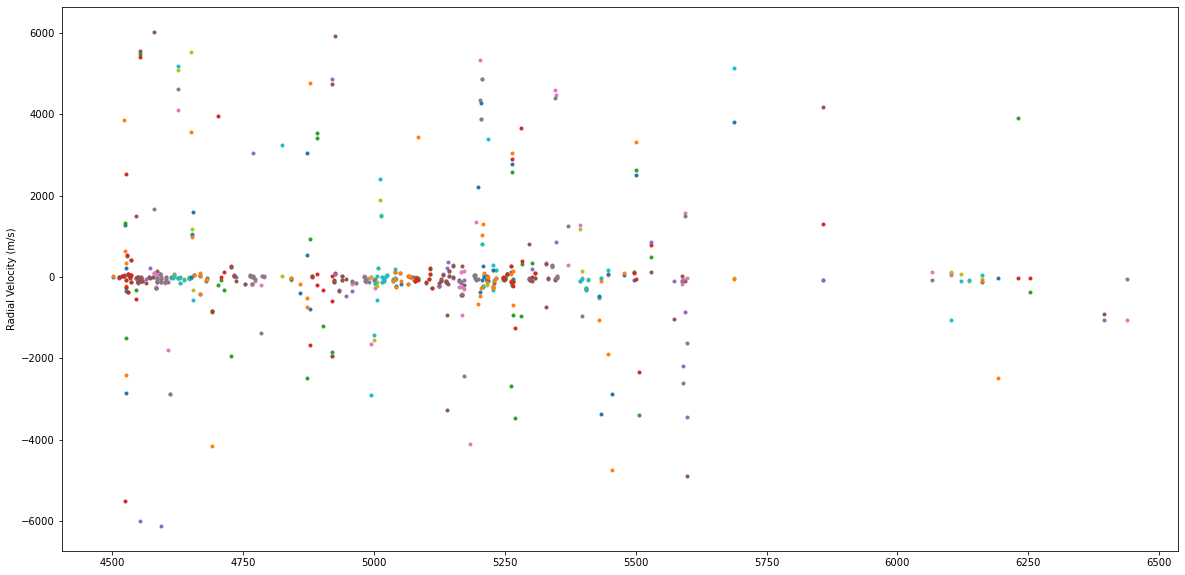

In [1]:
import numpy as np
from numpy import loadtxt
import scipy.constants as cnt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)

lines = loadtxt('data_229/lines_229.txt' , float) # loads the file with the line data
ori_lambda = lines[2:] # array with the reference values of the wavelength

numbers = np.arange(51,113) # array with the numbers used to access the files
n2 = np.arange(115,119)
numbers = np.append(numbers,n2)
n3 = np.arange(123,131)
numbers = np.append(numbers,n3)
n4 = np.arange(133,137)
numbers = np.append(numbers,n4)

N = len(numbers) 

data = np.zeros([N,27]) # empty matrix to store the fitted values of the wavelenghts
# the previous matrix has 27 columns because it is the maximum value of wavelenghts found
RV_matrix = np.zeros([N,27]) # empty matrix to store the RV values for each wavelenght
RV = np.zeros(0) # empty array to store the RV values
uncert_matrix = np.zeros([N,27])
uncert = np.zeros(0)
wave = np.zeros(0)

for i,n in enumerate(numbers):
    
    info=loadtxt('data_229/{}.ares'.format(n),float) # loads the file with the data
    
    if np.ndim(info)!=1:
        fit=info[:,8]
        ref=info[:,0]
        err=info[:,9]
        M=len(fit)
        
    else:
        fit=info[8]
        ref=info[0]
        err=[9]
        M=1
        
    data[i,:M]=fit #stores the data for each document in the data matrix
    wave = np.append(wave,data[i,:M])
    
    # this lines identify the lines that should be used from the original line data
    distances = np.abs(ori_lambda[:, np.newaxis] - ref)
    closest_indices = np.argmin(distances, axis=0)
    ref= ori_lambda[closest_indices]
    
    RV_matrix[i,:M] = (fit - ref) / ref * cnt.c # calculates the values of RV and stores them in the RV_matrix
    RV=np.append(RV,RV_matrix[i,:M]) # stores the values in the RV array
    uncert_matrix[i,:M] = err / ref *cnt.c
    uncert = np.append(uncert,uncert_matrix[i,:M])
    
    plt.plot(ref,RV_matrix[i,:M],'.') # plots the graphic
    
N_dim_229 = np.zeros(3,dtype=int) # array to store the number of lines in the beguining and after removing outliers
N_dim_229[0] = len(RV)

uncert_229 = uncert
wave_229 = wave
    
plt.ylabel('Radial Velocity (m/s)')
plt.show()

By plotting each graph individually, I verified that the most disparate values are found approximately in the region of the extreme wavelengths for each set of data, but this is not always verified. They will perhaps be removed when a later statistic is carried out. For the same wavelengths I have 2 sets of data and I decided not to combine the calculated values of the radial velocities for each one and keep the measurements independent, as there are outliers in one set that are not outliers in the other, so I can then opt for just one of the values.

In [2]:
index = {}

for i in range(N):
    for j in range(27):
        if data[i,j] != 0:
            index[data[i,j]] = (i,j)
        else:
            pass

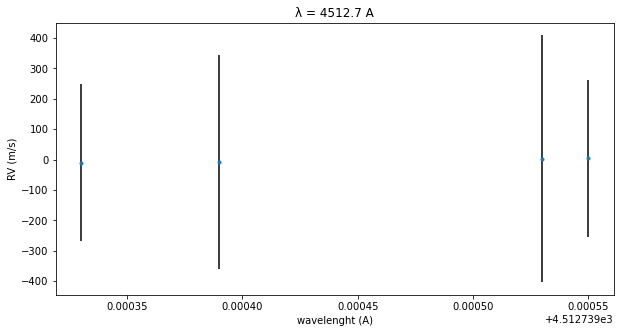

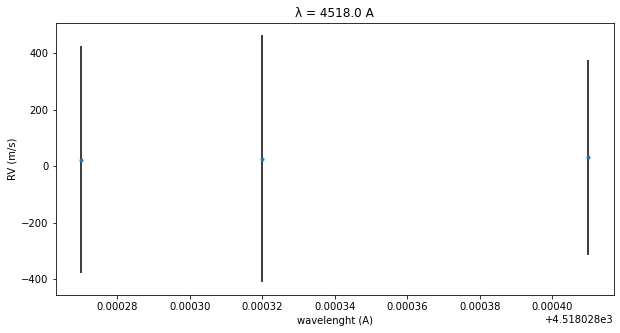

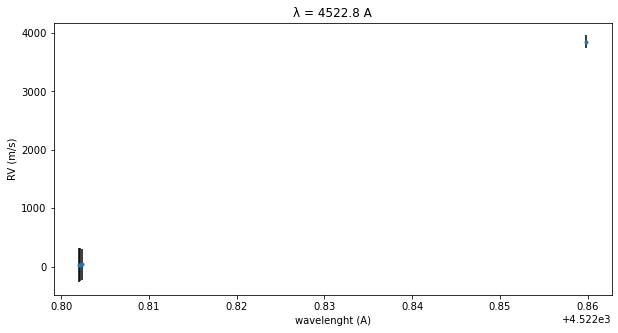

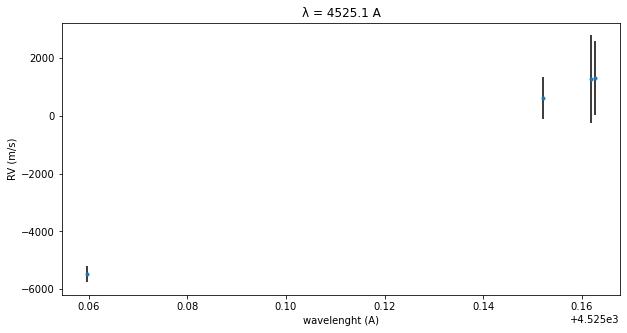

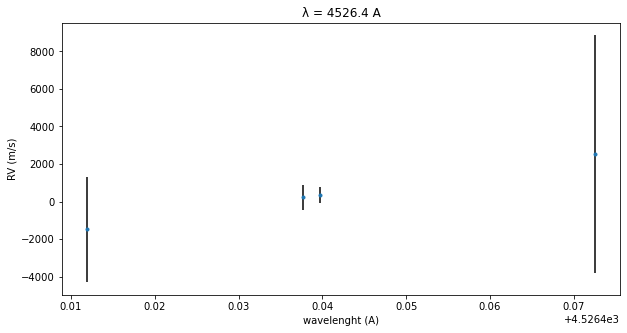

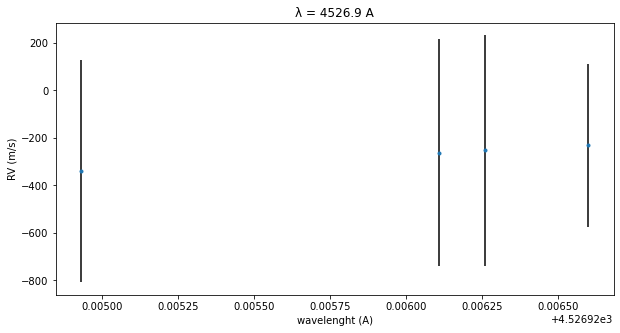

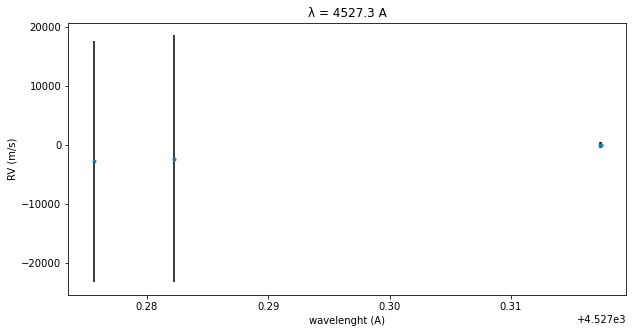

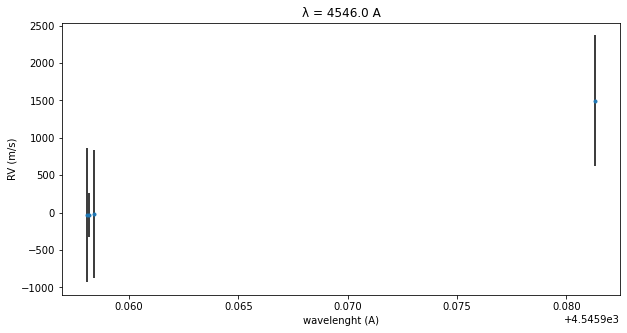

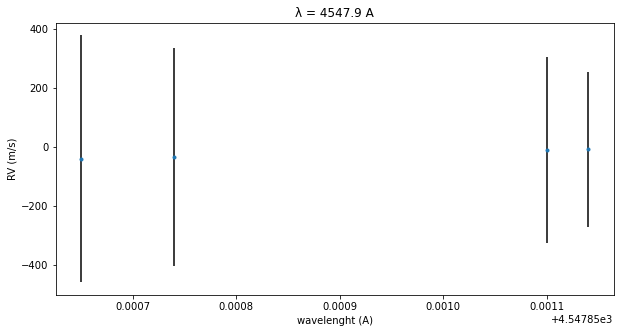

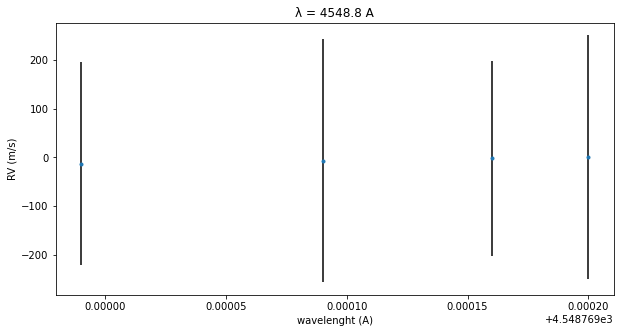

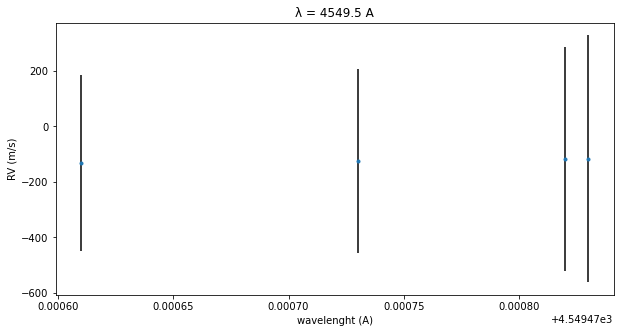

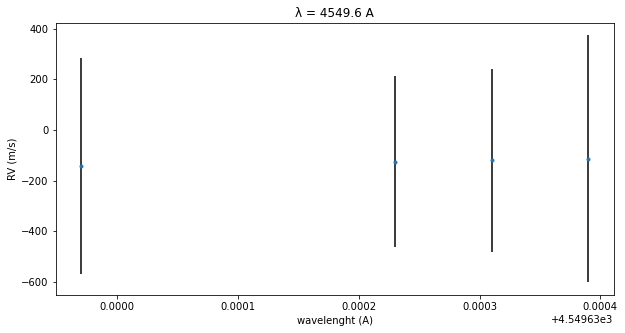

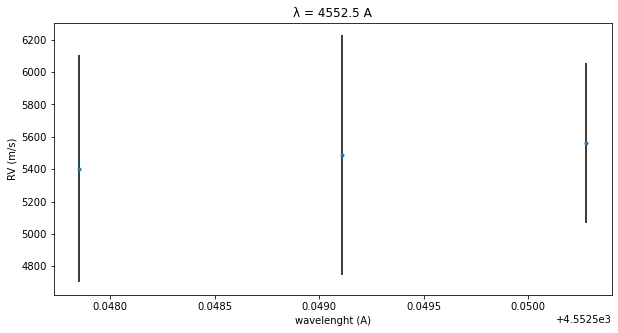

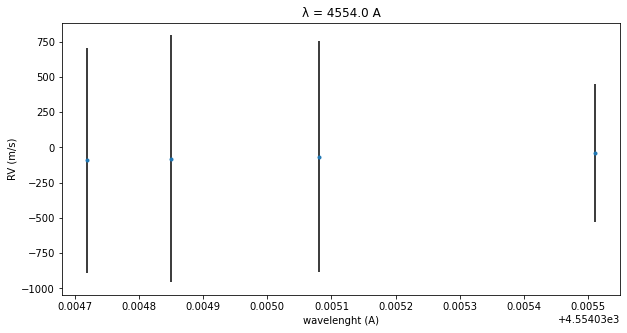

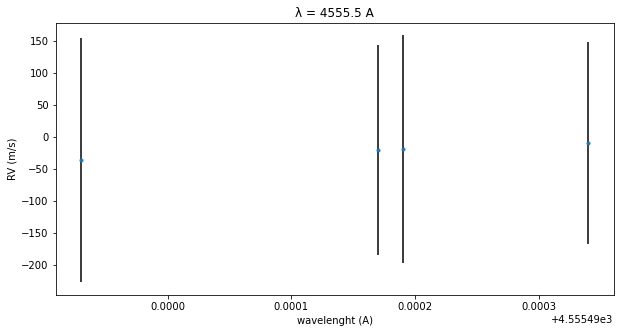

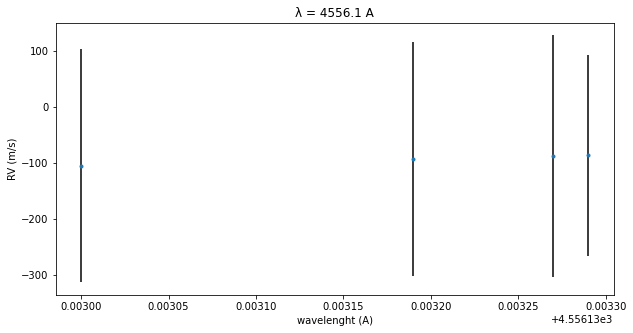

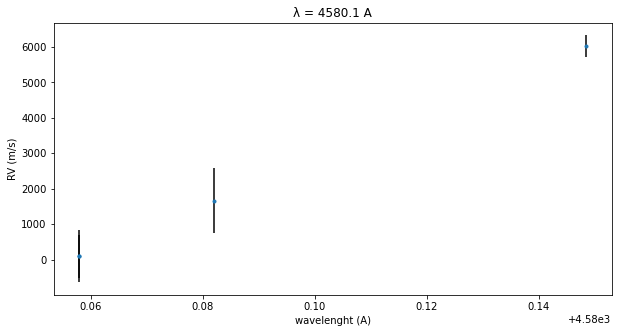

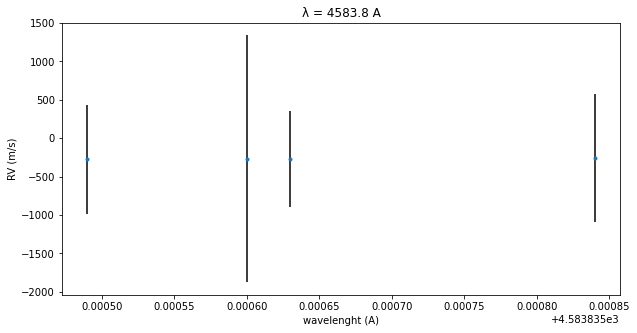

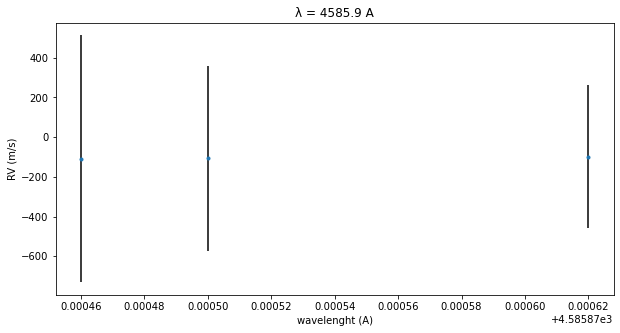

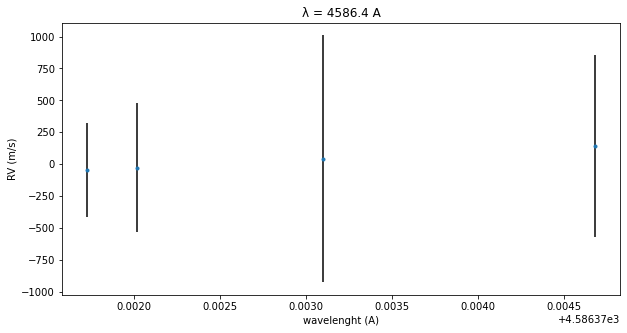

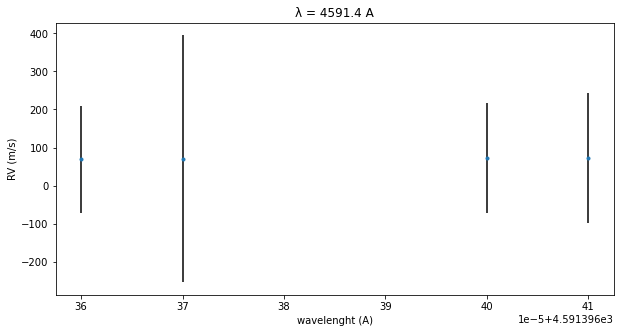

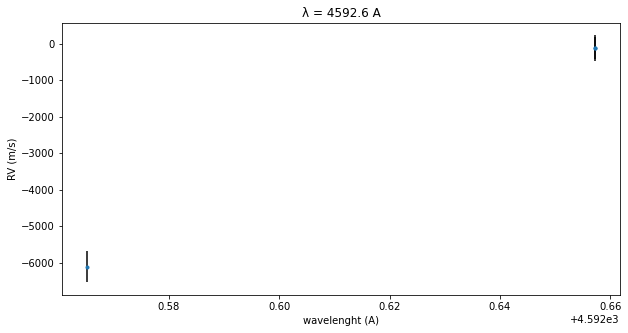

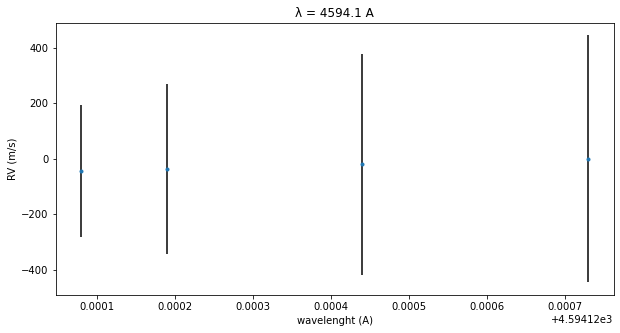

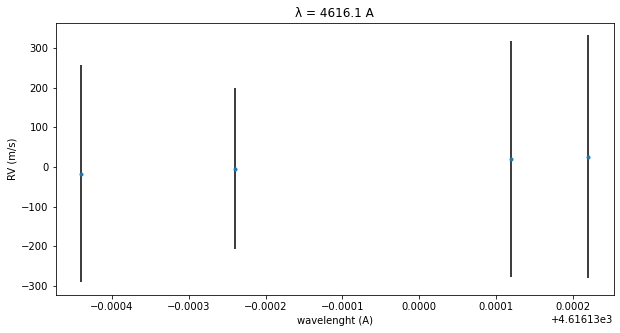

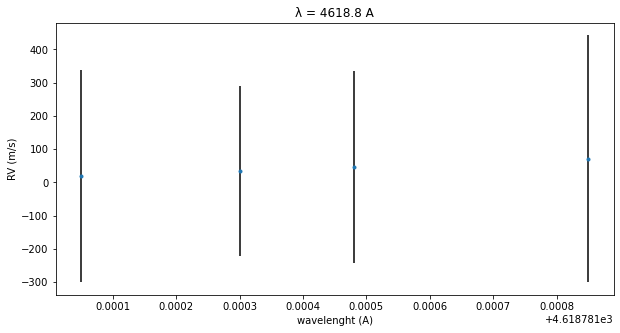

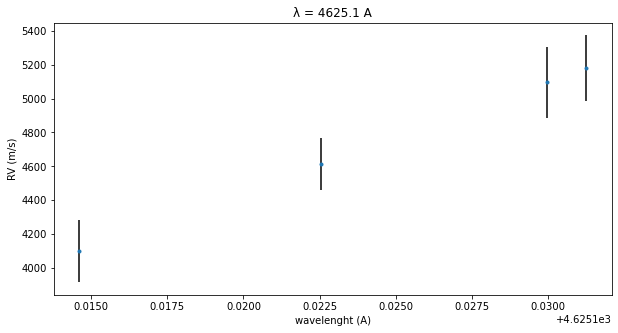

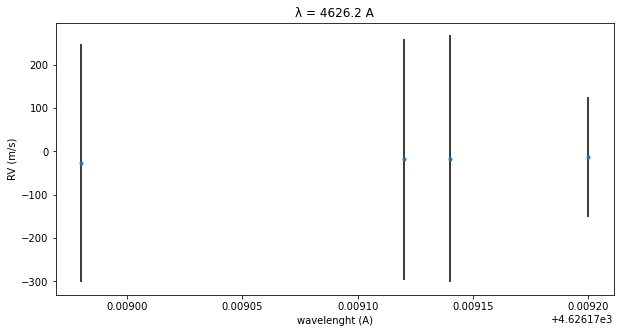

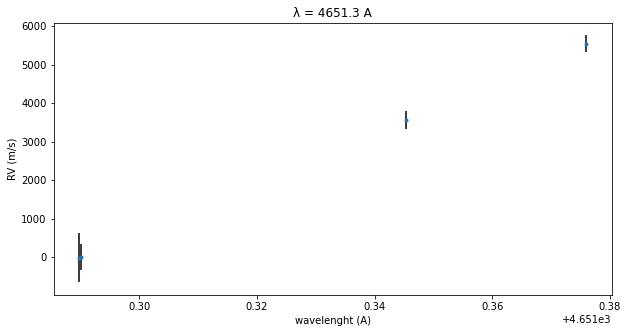

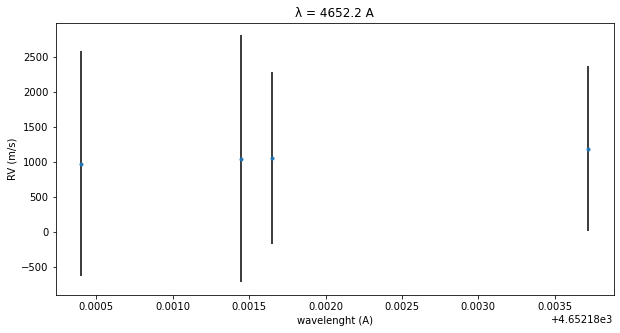

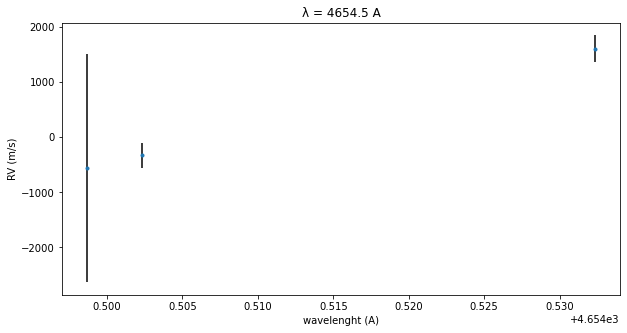

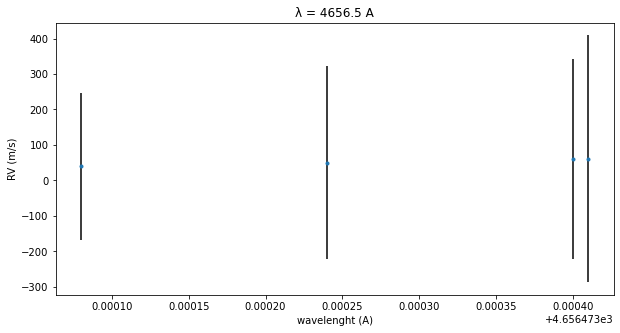

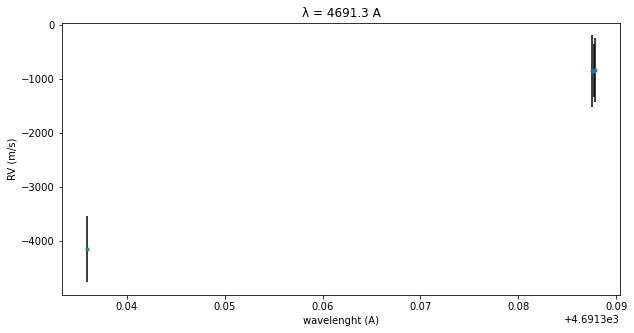

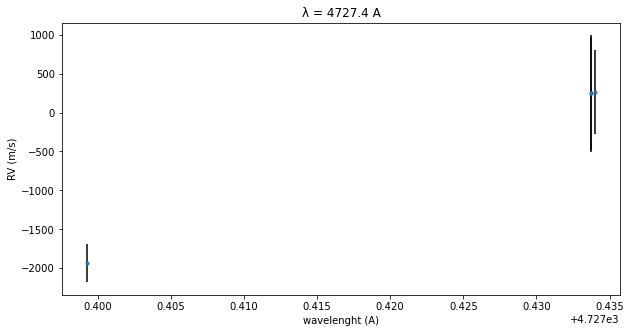

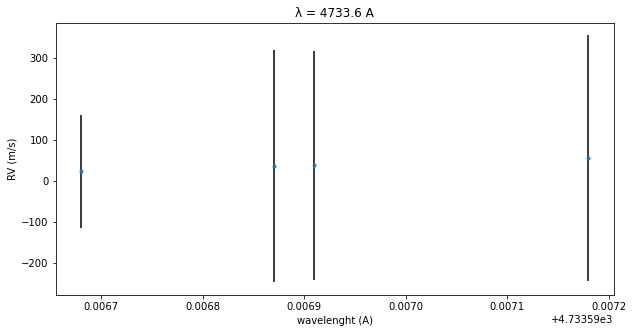

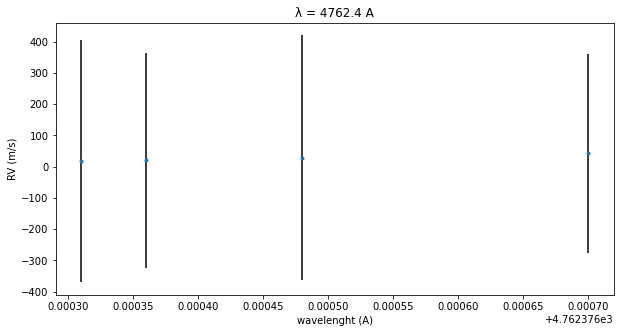

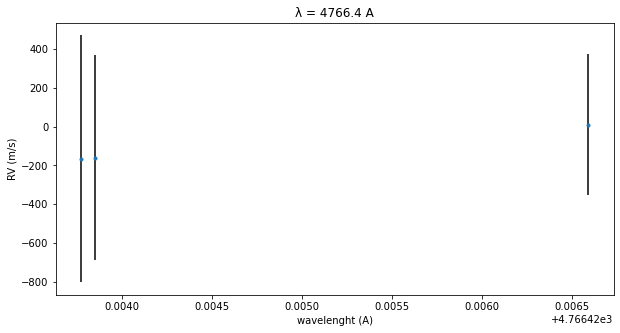

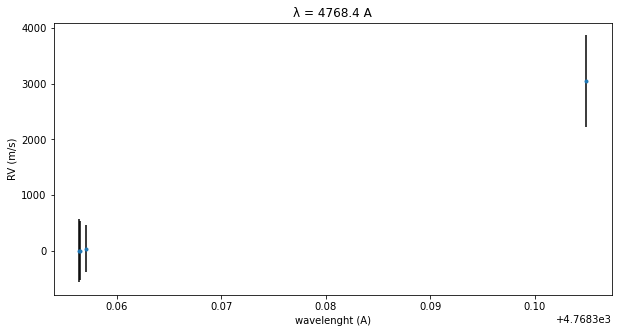

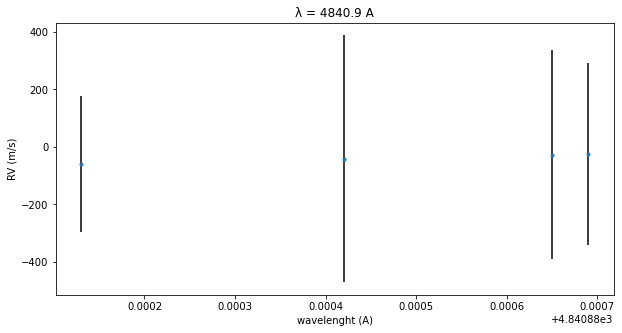

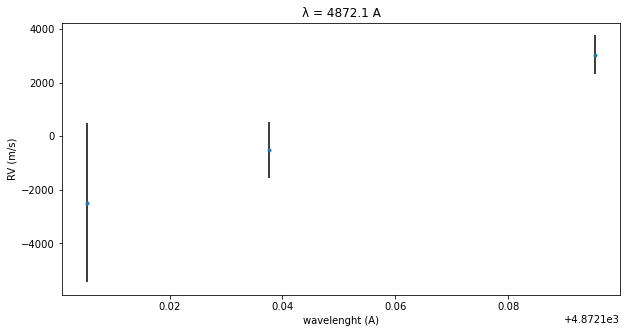

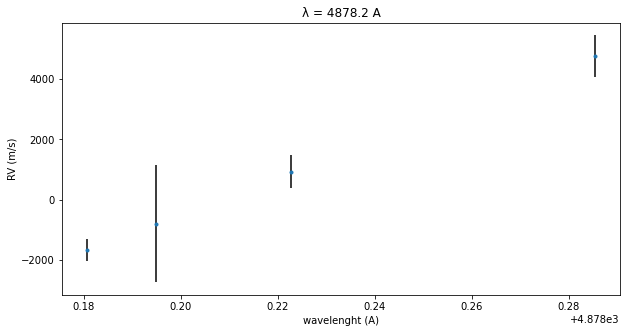

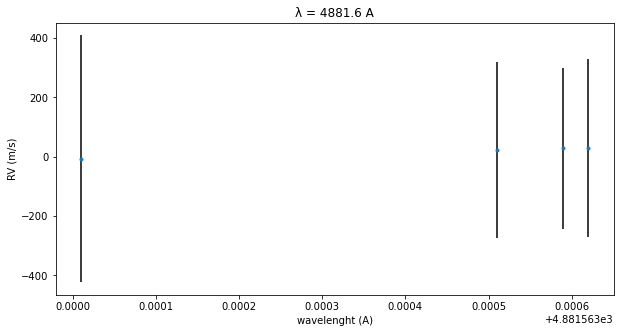

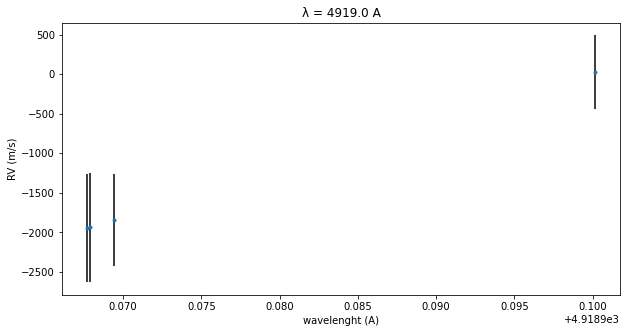

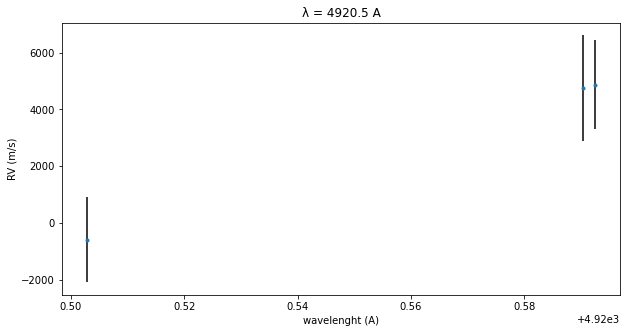

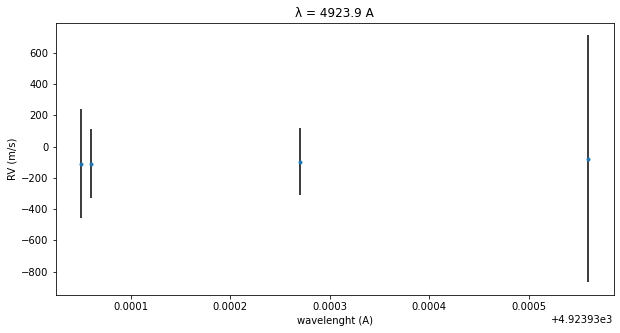

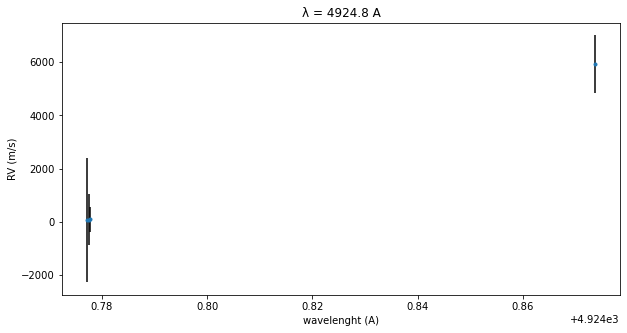

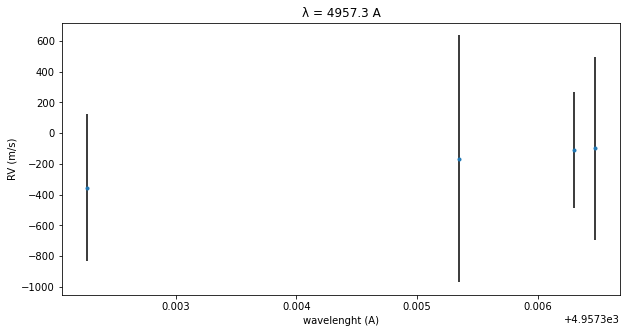

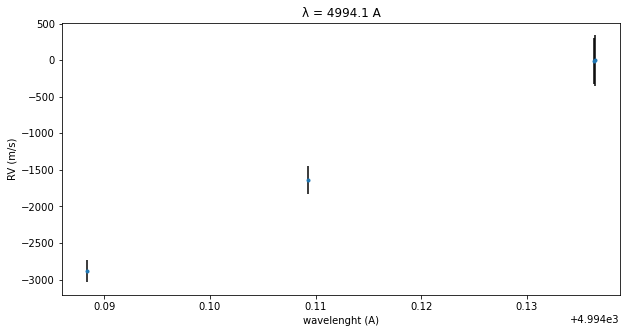

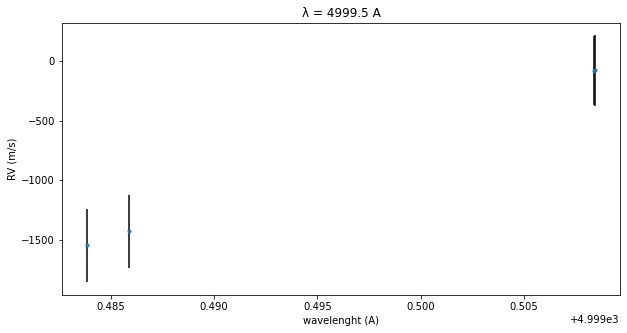

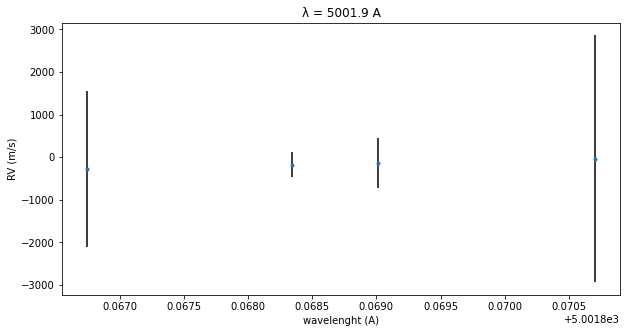

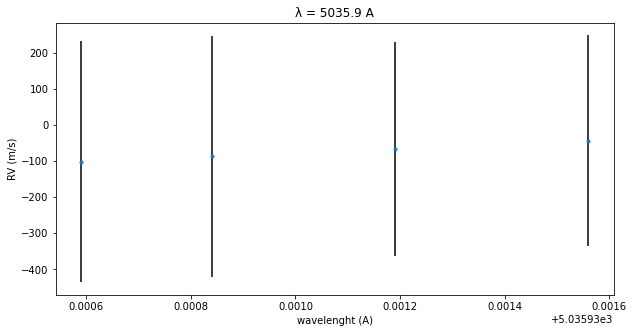

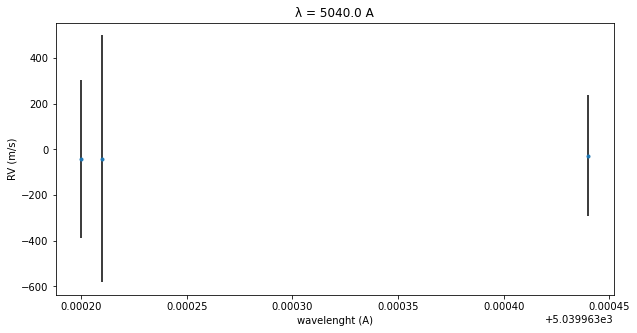

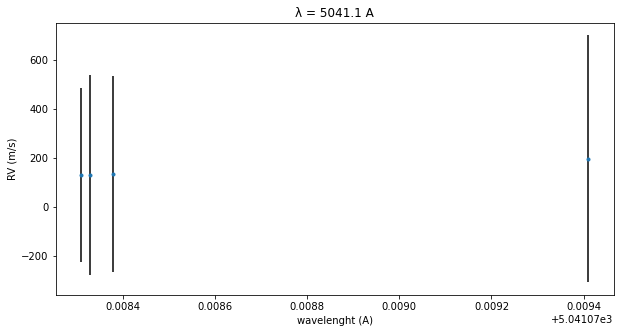

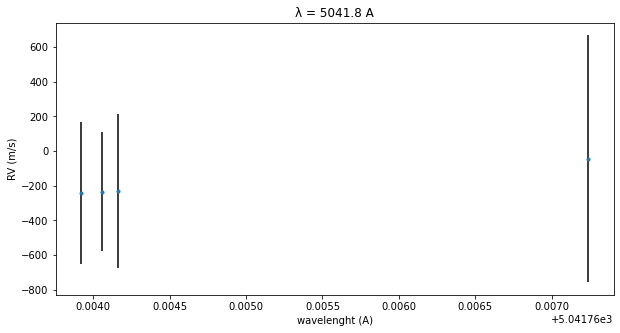

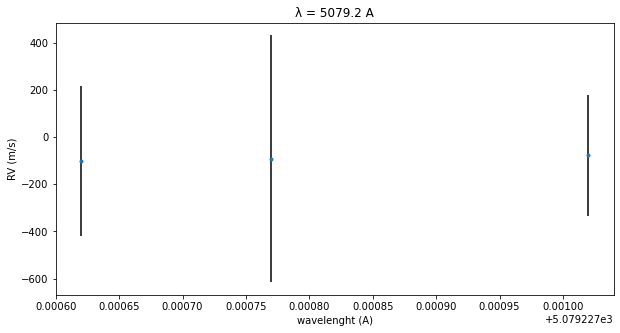

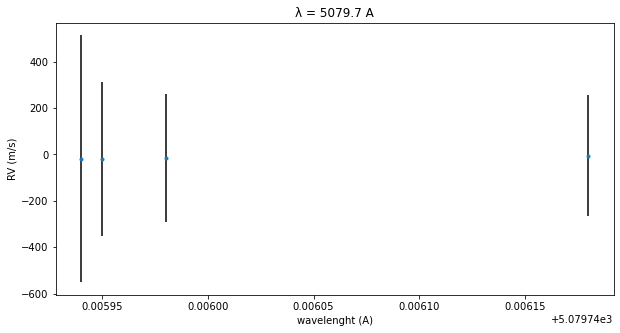

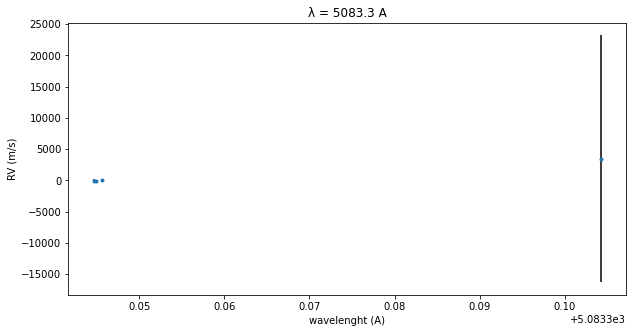

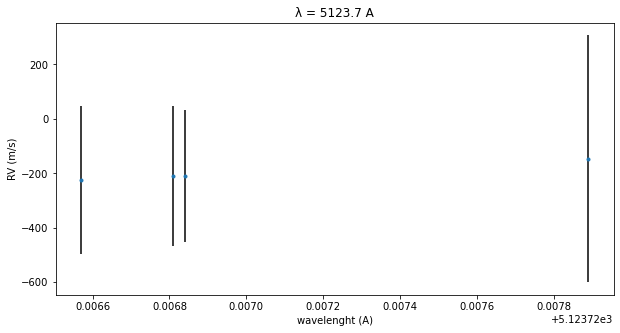

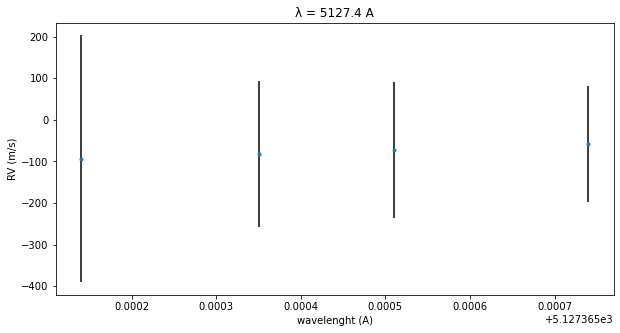

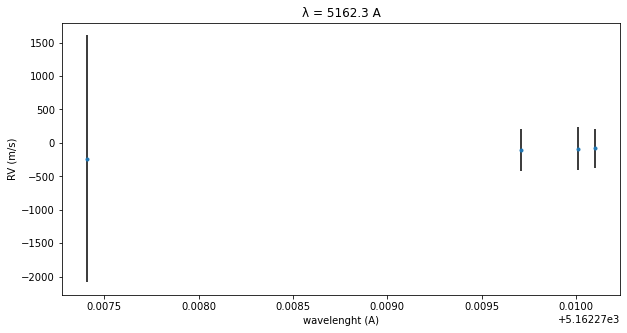

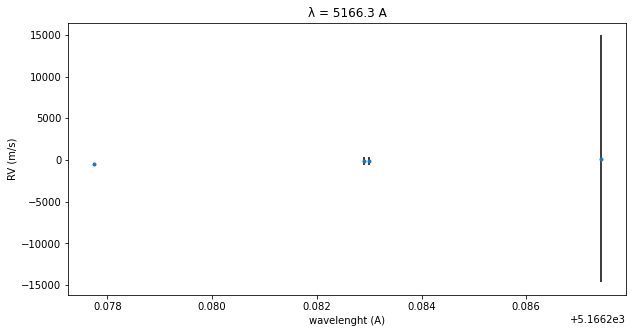

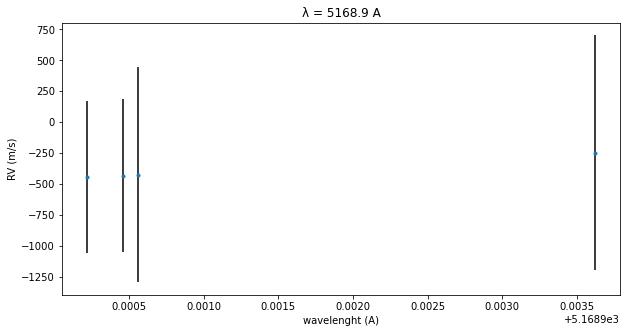

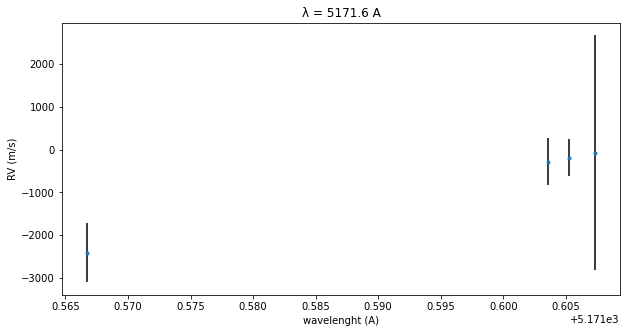

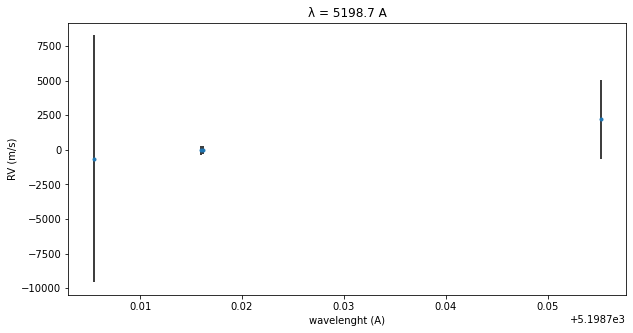

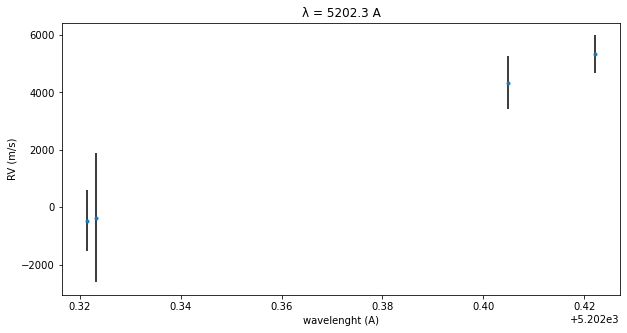

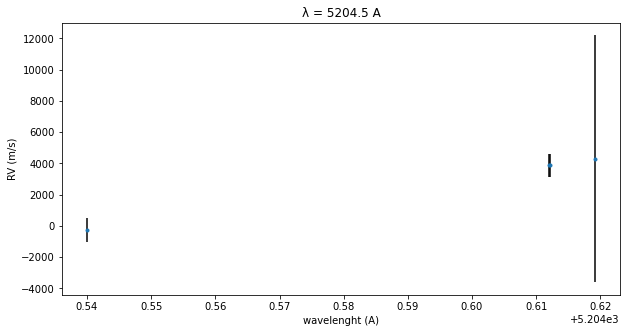

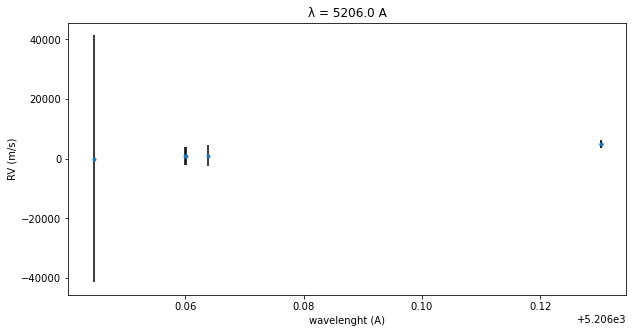

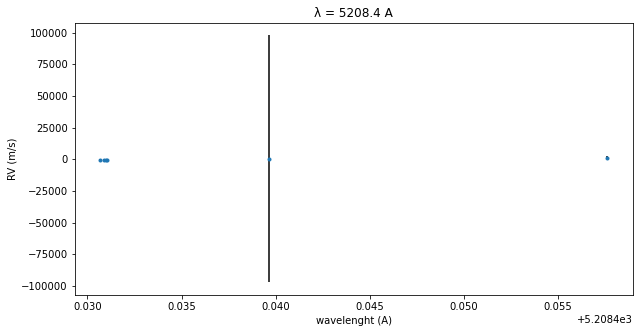

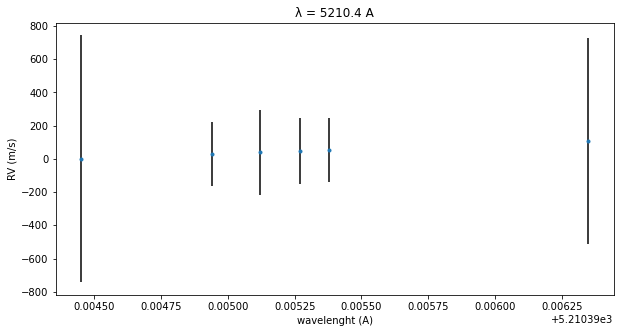

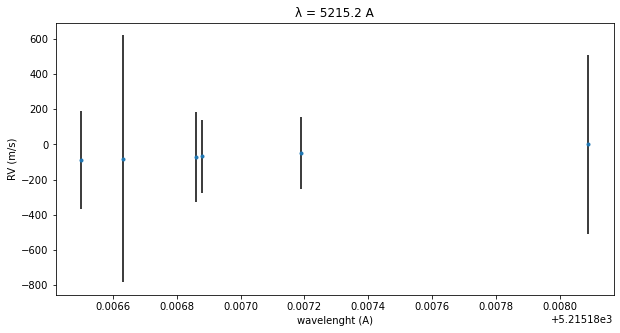

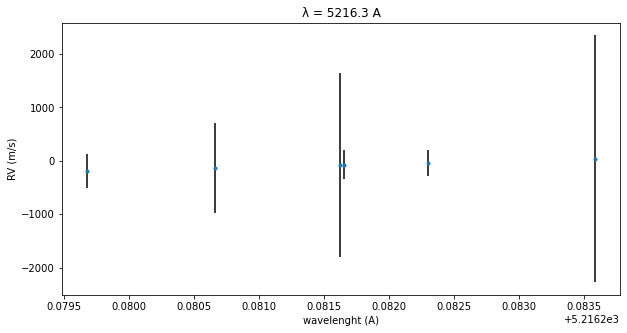

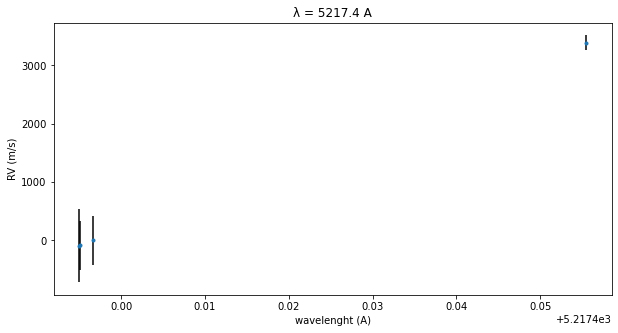

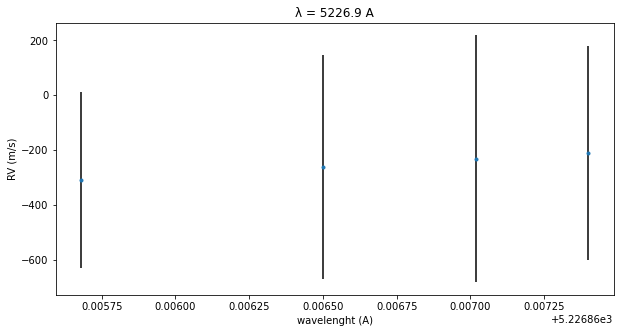

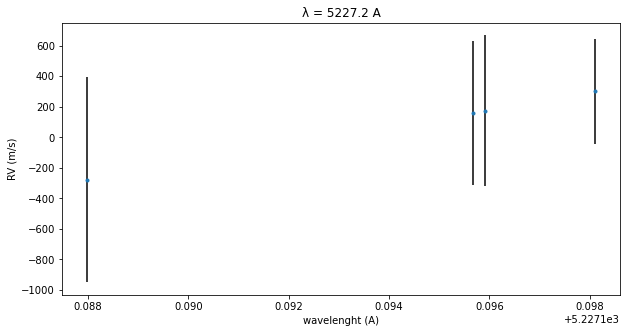

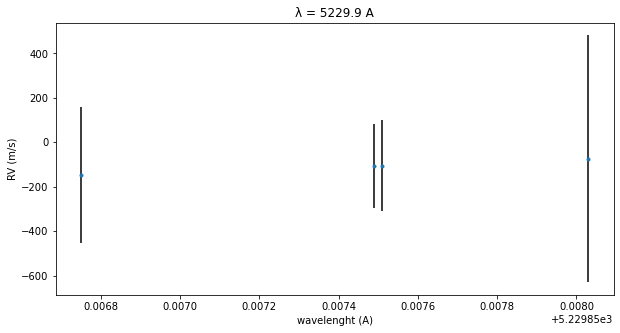

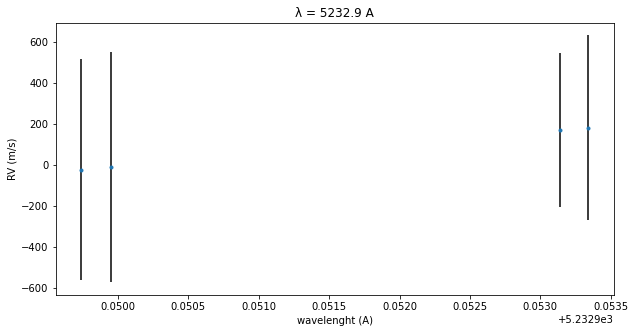

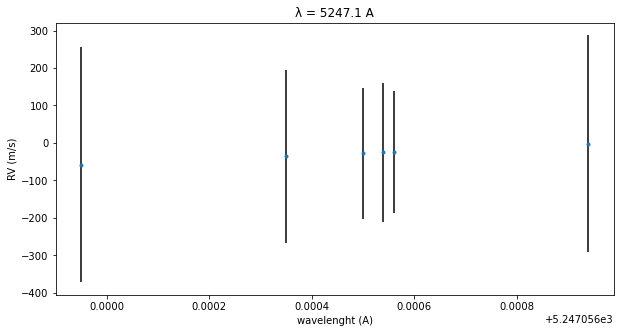

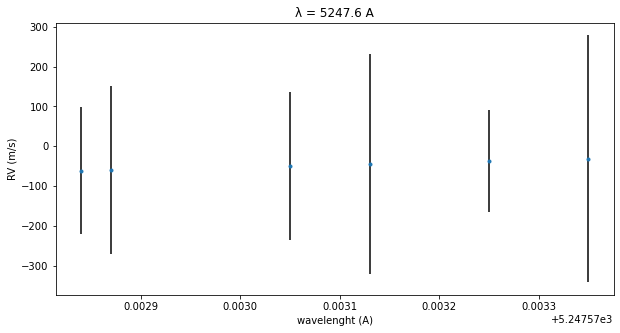

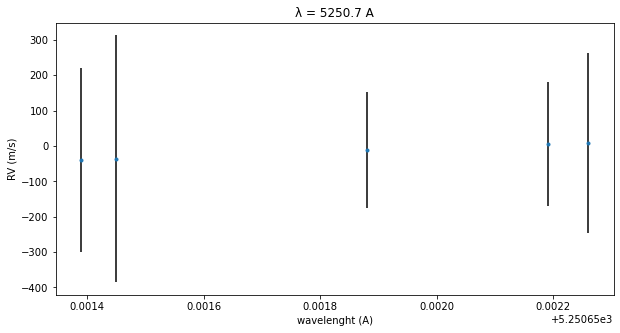

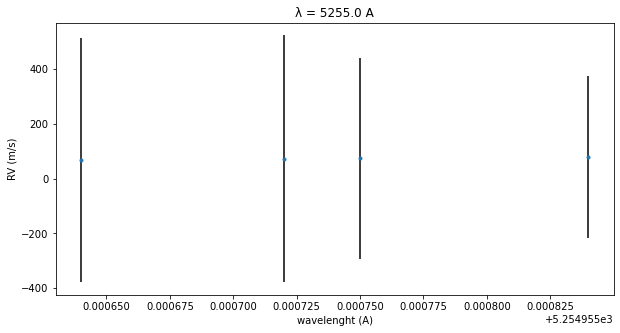

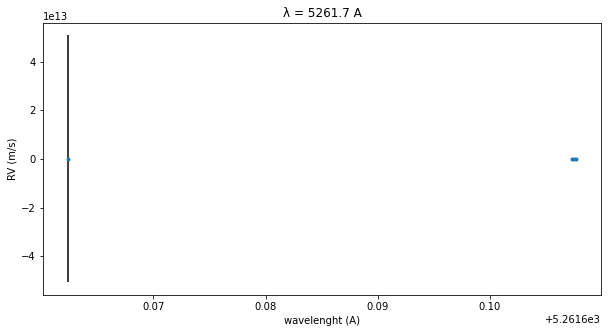

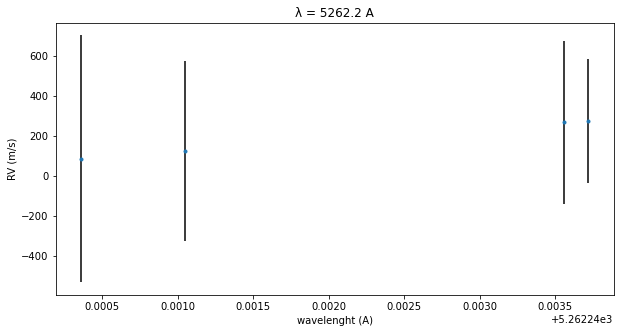

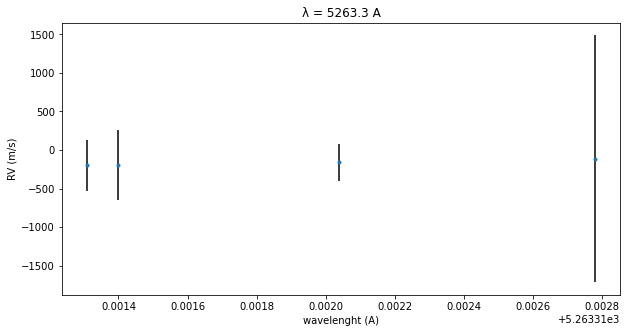

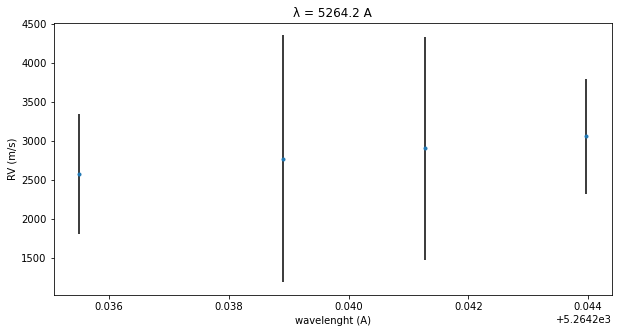

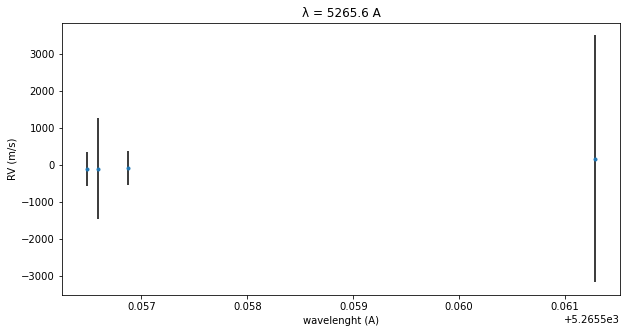

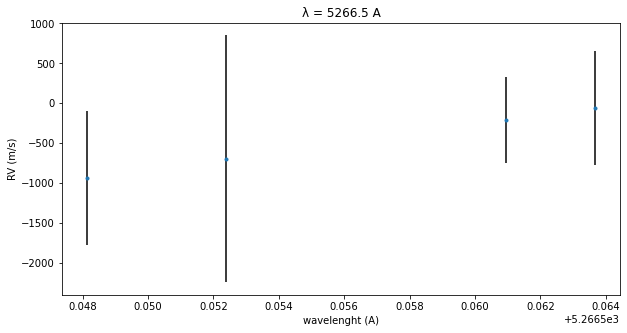

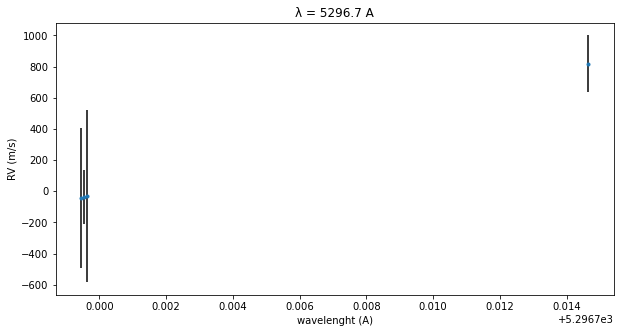

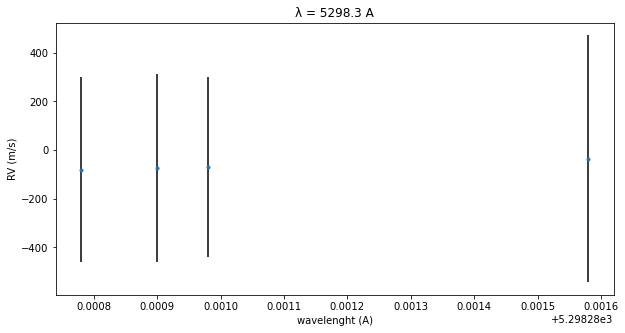

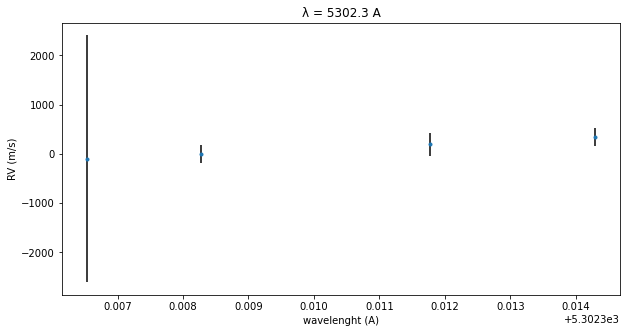

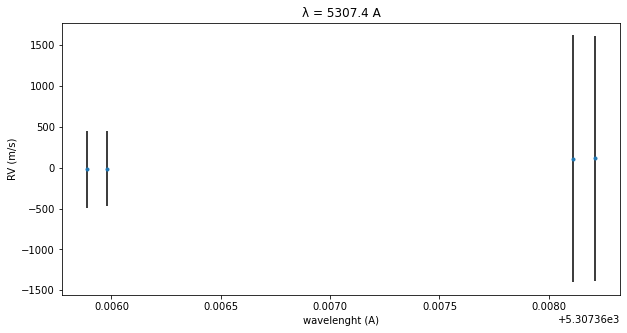

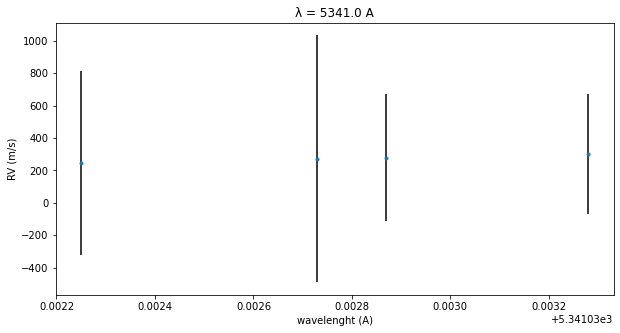

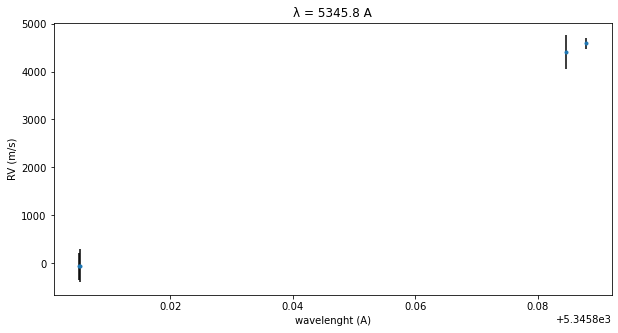

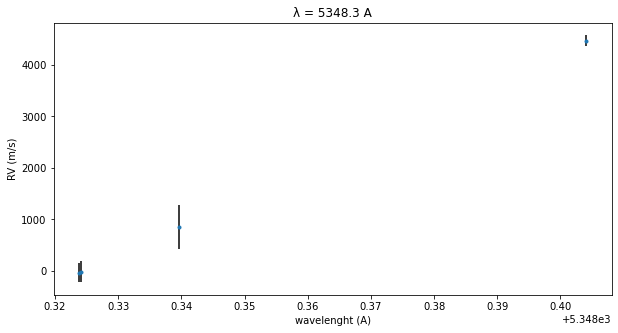

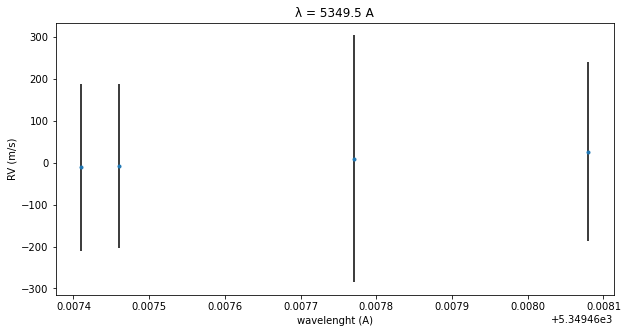

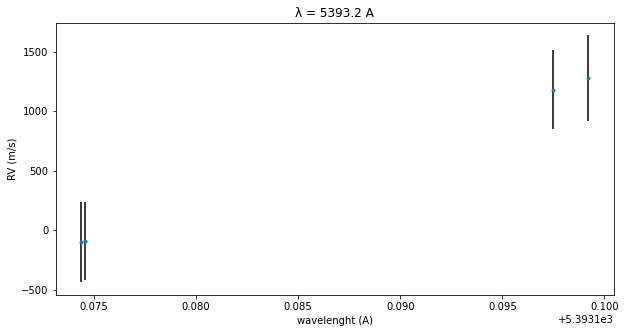

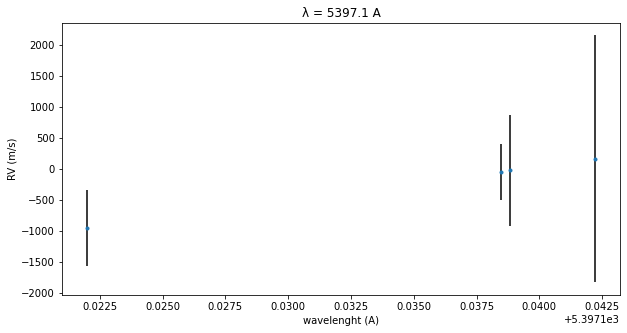

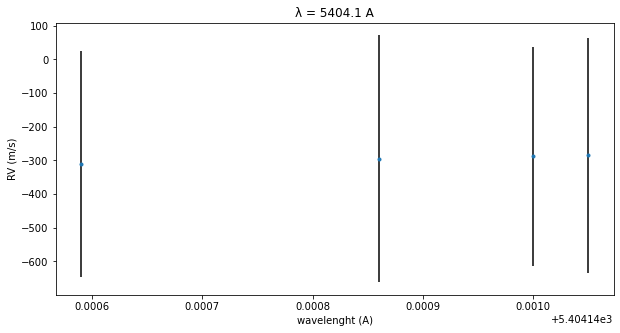

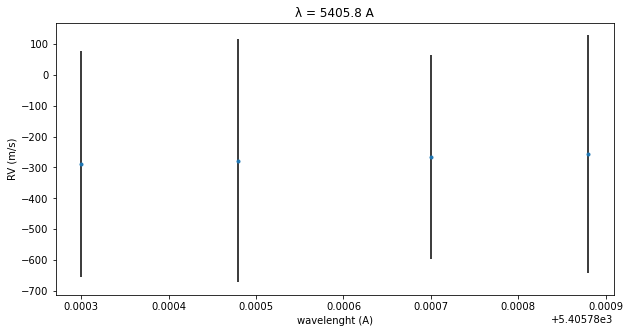

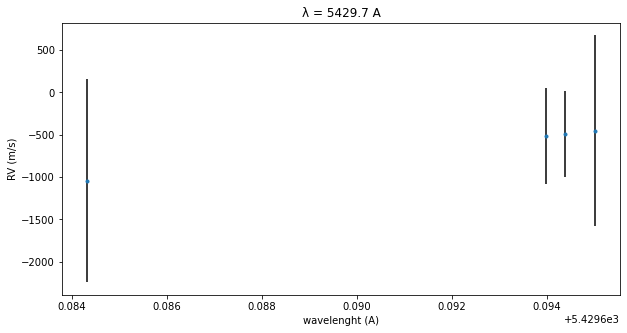

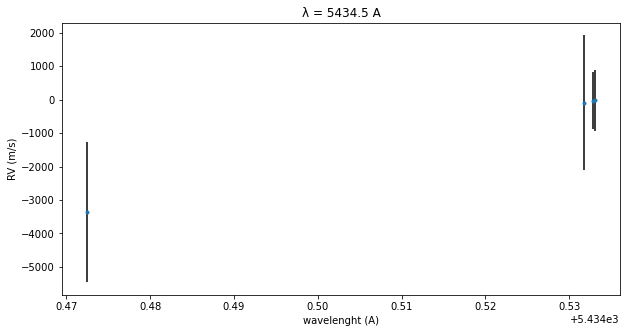

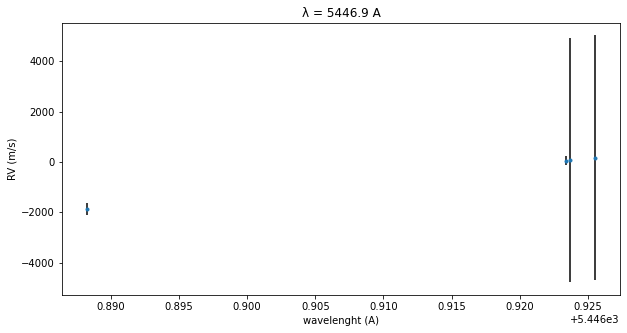

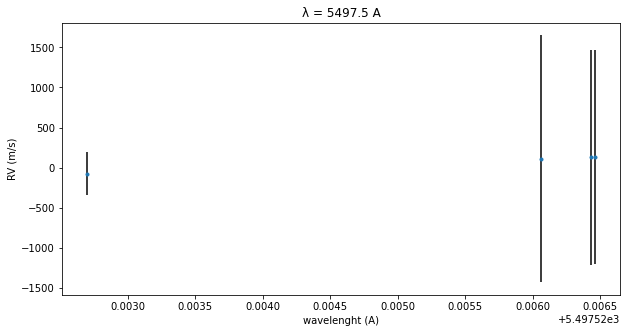

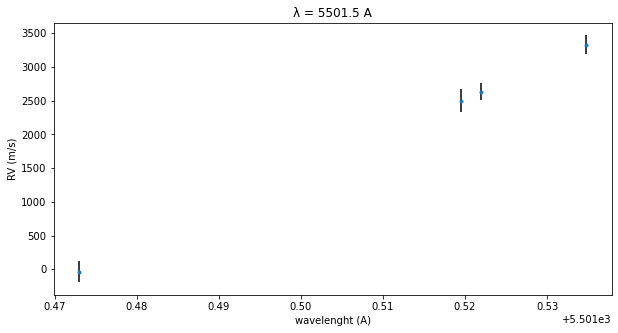

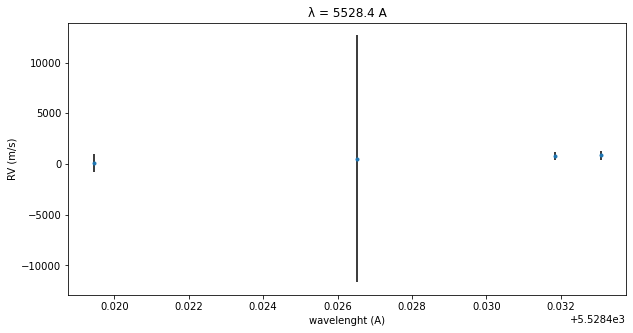

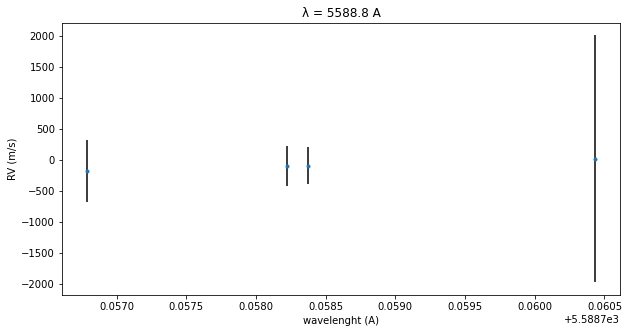

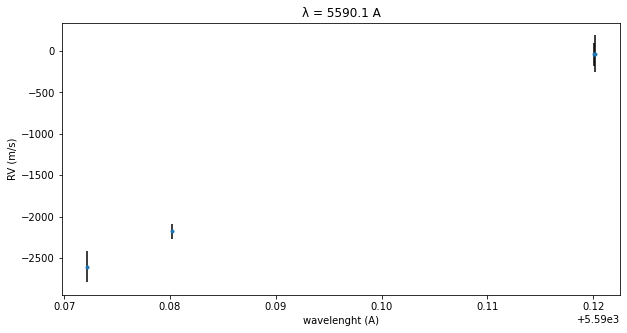

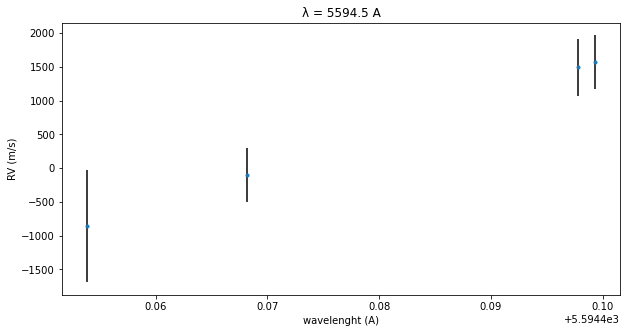

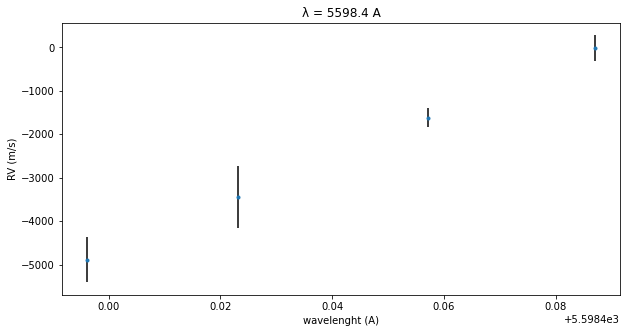

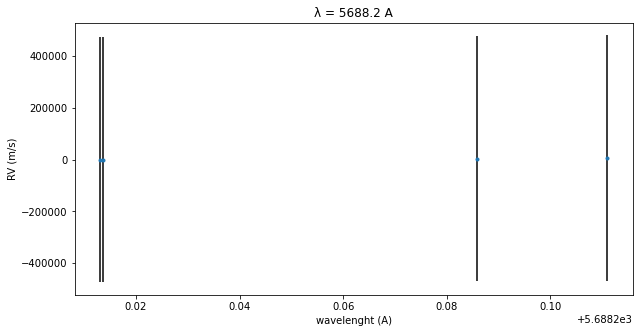

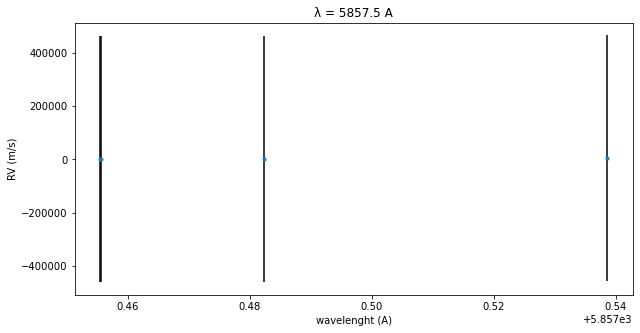

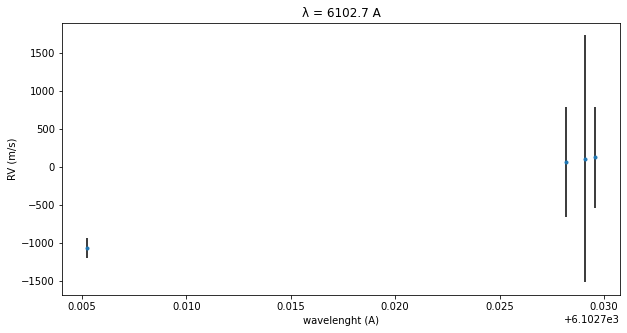

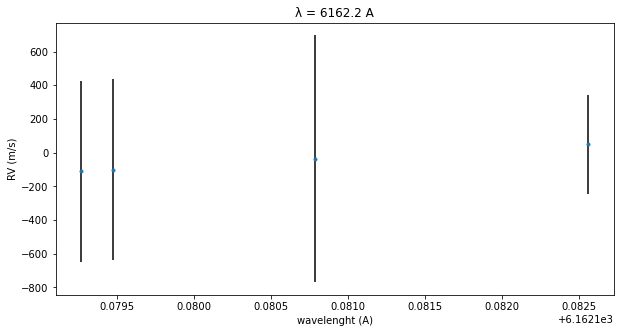

In [3]:
plt.rcParams['figure.figsize'] = (10, 5)

sorted_index = sorted(index.keys())

(a,b)=index.get(sorted_index[0])

wave=np.array([sorted_index[0]])
rv=np.array([RV_matrix[a,b]])
er=np.array([uncert_matrix[a,b]])

n=1

while n < len(index):
    if abs(sorted_index[n]-sorted_index[n-1])<0.1:
        (a,b)=index.get(sorted_index[n])
        wave=np.append(wave,sorted_index[n])
        rv=np.append(rv,RV_matrix[a,b])
        er=np.append(er,uncert_matrix[a,b])
    else:
        if len(wave)>2:
            plt.errorbar(wave,rv,yerr=er,ecolor='black',fmt='.')
            plt.xlabel('wavelenght (A)')
            plt.ylabel('RV (m/s)')
            plt.title('λ = {:.1f} A'.format(wave[0]))
            plt.show()
        (a,b)=index.get(sorted_index[n])
        wave=np.array([sorted_index[n]])
        rv=np.array([RV_matrix[a,b]])
        er=np.array([uncert_matrix[a,b]])
    n+=1

In the above graphics, we selected the waveleghts wich appear more than once in our data, in order to compare the values and the errors for diferent orders. As we can see, those orders do not appear to be higher than the third (but most graphics don't go further than the second). If we wave, for example, 4 values, we only have 2 orders, because we wave two independent mesures of each part of the spectre. Viewing the results, the distribuition of values and errors seems random for most values, but in another document I tried to find some reasons for we than does not happen.

The bellow graphic shows the obtained values for the radial velocities. It is easy to notice the presence of some outliers. The mean ($\mu$ - red line), standard deviation ($\sigma$) and median (green line) of the values is also presented. Actually, the standard deviation is much bigger than the mean value, so the outliers were successivly removed until the standard deviation was smaller than the mean. All the values outside of $[\mu - \sigma , \mu + \sigma]$ were removed and new values for $\mu$, $\sigma$ and median were calculated.

mean = 113.14050 m/s ; standard deviation / √N = 52.10253 m/s
weighted mean = -65.36045 m/s ; weighted standard deviation / √N = 0.50249 m/s
median = -31.72035 m/s


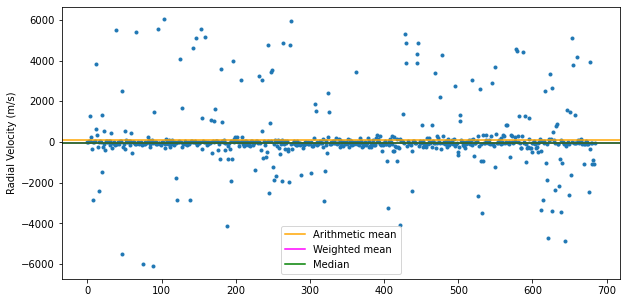

In [4]:
std = np.std(RV) #standard deviation of the values of the RVs
mean = np.mean(RV) # mean of the values of the RVs

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV - wmean) / uncert_229
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    wmean = (RV * pi * uncert_229 ** (-2)).sum() / (pi * uncert_229 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_229 ** (-2)).sum())
    sigma = (RV - wmean) / uncert_229
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
median = np.median(RV) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

Now we add the RV value calculated by ARES.

mean = -16486.85950 m/s ; standard deviation / √N = 52.10253 m/s
weighted mean = -16665.36045 m/s ; weighted standard deviation / √N = 0.50249 m/s
median = -16631.72035 m/s


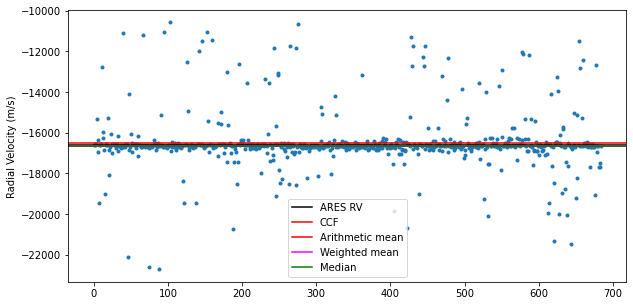

In [5]:
ARES_RV = -16600

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='red')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

Removing outliers:

mean = -47.64033 m/s ; standard deviation / √N = 22.63936 m/s
weighted mean = -50.72104 m/s ; weighted standard deviation / √N = 0.52816 m/s
median = -36.03599 m/s


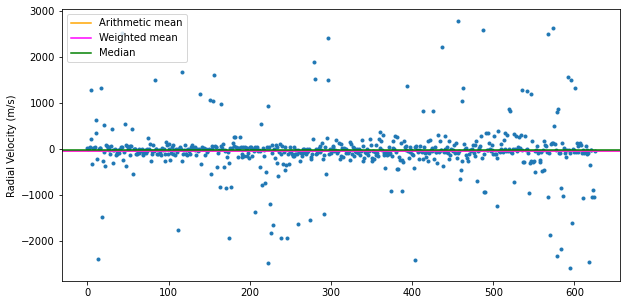

In [6]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
corr_median = np.median(corrRV)

N_dim_229[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

mean = -16647.64033 m/s ; standard deviation / √N = 22.63936 m/s
weighted mean = -16650.72104 m/s ; weighted standard deviation / √N = 0.52816 m/s
median = -16636.03599 m/s


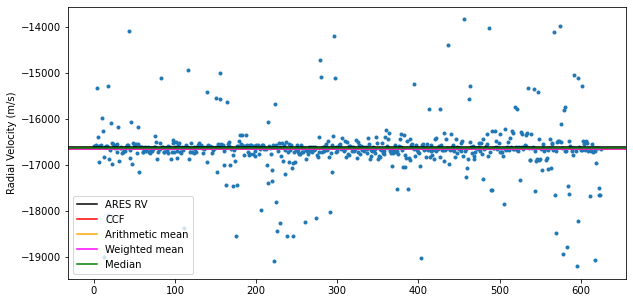

In [7]:
print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

Removing outliers (2):

mean = -52.02948 m/s ; standard deviation / √N = 10.77008 m/s
weighted mean = -47.22255 m/s ; weighted standard deviation / √N = 0.54807 m/s
median = -36.35188 m/s


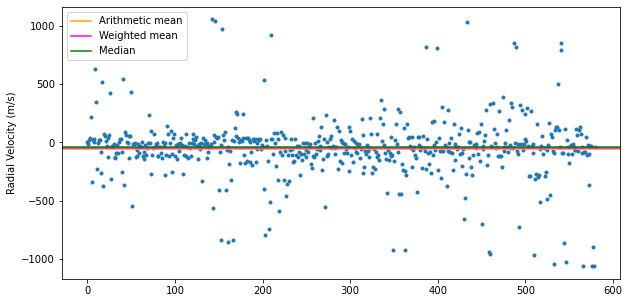

In [8]:
corr2RV = np.zeros(0)
corr2_uncert = np.zeros(0)

for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
    if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
        corr2RV = np.append(corr2RV,rv)
        corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)

corr2_wmean = corr2_mean
corr2_wstd = 0
f0 = 2e-3
sigma = (corr2RV - corr2_wmean) / corr2_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
    corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
    sigma = (corr2RV - corr2_wmean) / corr2_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
corr2_median = np.median(corr2RV)

N_229 = len(corr2RV)
mean_229 = corr2_mean
std_229 = corr2_std
wmean_229 = corr2_wmean
wstd_229 = corr2_wstd
median_229 = corr2_median

N_dim_229[2] = N_229

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median))

plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median, label= 'Median', color ='green')
plt.legend()
plt.show()

mean = -16652.02948 m/s ; standard deviation / √N = 10.77008 m/s
weighted mean = -16647.22255 m/s ; weighted standard deviation / √N = 0.54807 m/s
median = -16636.35188 m/s


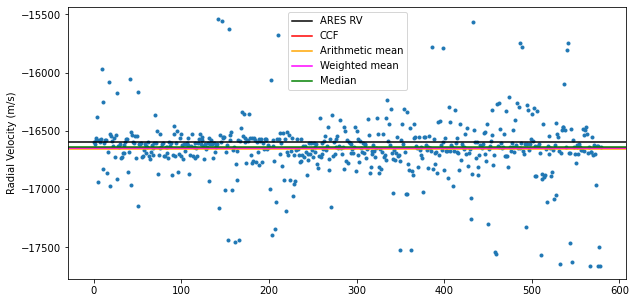

In [9]:
print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

Matrix = np.zeros([4,5])
Matrix[0,0] = corr2_mean + ARES_RV
Matrix[0,1] = corr2_std / np.sqrt(len(corr2RV))
Matrix[0,2] = corr2_wmean + ARES_RV
Matrix[0,3] = corr2_wstd / np.sqrt(len(corr2RV))
Matrix[0,4] = corr2_median + ARES_RV

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## 595

To speed up the running time of ARES, now we chose rejt=0.997.

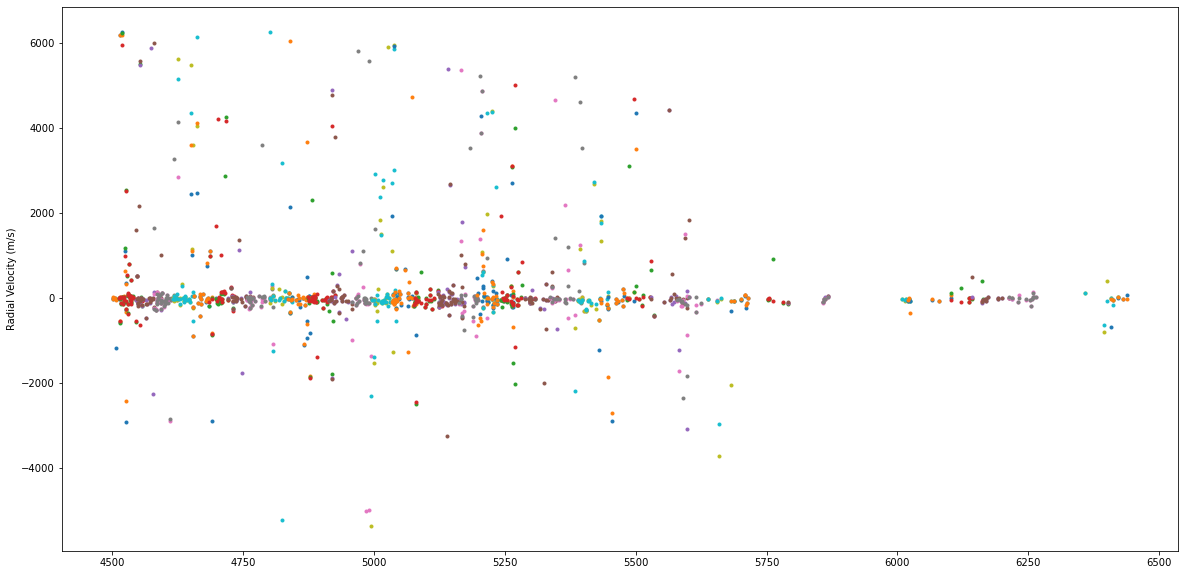

In [10]:
plt.rcParams['figure.figsize'] = (20, 10)

lines = loadtxt('data_595/lines_595.txt' , float) # loads the file with the line data
ori_lambda = lines[2:] # array with the reference values of the wavelength

numbers = np.arange(51,119) # array with the numbers used to access the files
n2 = np.arange(121,131)
numbers = np.append(numbers,n2)
n3 = np.arange(133,137)
numbers = np.append(numbers,n3)

N = len(numbers) 

data = np.zeros([N,45]) # empty matrix to store the fitted values of the wavelenghts
# the previous matrix has 27 columns because it is the maximum value of wavelenghts found
RV_matrix = np.zeros([N,45]) # empty matrix to store the RV values for each wavelenght
RV = np.zeros(0) # empty array to store the RV values
uncert_matrix = np.zeros([N,45])
uncert = np.zeros(0)
wave = np.zeros(0)

for i,n in enumerate(numbers):
    
    info=loadtxt('data_595/{}.ares'.format(n),float) # loads the file with the data
    
    if np.ndim(info)!=1:
        fit=info[:,8]
        ref=info[:,0]
        err=info[:,9]
        M=len(fit)
        
    else:
        fit=info[8]
        ref=info[0]
        err=[9]
        M=1
        
    data[i,:M]=fit #stores the data for each document in the data matrix 
    wave = np.append(wave,data[i,:M])
    
    # this lines identify the lines that should be used from the original line data
    distances = np.abs(ori_lambda[:, np.newaxis] - ref)
    closest_indices = np.argmin(distances, axis=0)
    ref= ori_lambda[closest_indices]
    
    RV_matrix[i,:M] = (fit - ref) / ref * cnt.c # calculates the values of RV and stores them in the RV_matrix
    RV=np.append(RV,RV_matrix[i,:M]) # stores the values in the RV array
    uncert_matrix[i,:M] = err / ref *cnt.c
    uncert = np.append(uncert,uncert_matrix[i,:M])
    
    plt.plot(ref,RV_matrix[i,:M],'.') # plots the graphic
    
N_dim_595 = np.zeros(3,dtype=int) # array to store the number of lines in the beguining and after removing outliers
N_dim_595[0] = len(RV)

uncert_595 = uncert
wave_595 = wave
    
plt.ylabel('Radial Velocity (m/s)')
plt.show()

mean = 167.20694 m/s ; standard deviation / √N = 27.26428 m/s
weighted mean = -45.35358 m/s ; weighted standard deviation / √N = 0.16691 m/s
median = -23.52117 m/s


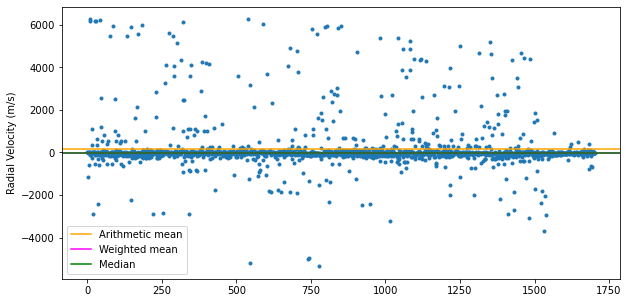

mean = -16432.79306 m/s ; standard deviation / √N = 27.26428 m/s
weighted mean = -16645.35358 m/s ; weighted standard deviation / √N = 0.16691 m/s
median = -16623.52117 m/s


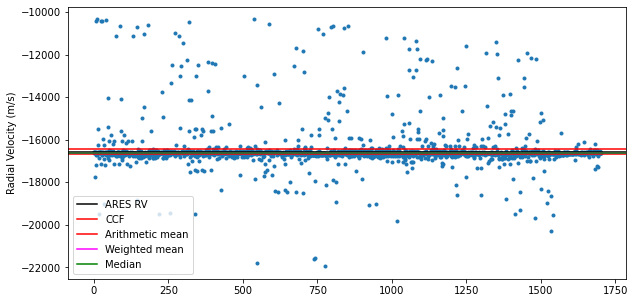

In [11]:
plt.rcParams['figure.figsize'] = (10, 5)

std = np.std(RV) # standard deviation of the values of the RVs
mean = np.mean(RV) # mean of the values of the RVs

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV - wmean) / uncert_595
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    wmean = (RV * pi * uncert_595 ** (-2)).sum() / (pi * uncert_595 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_595 ** (-2)).sum())
    sigma = (RV - wmean) / uncert_595
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
median = np.median(RV) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

ARES_RV = -16600

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='red')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

Removing outliers:

mean = -10.38210 m/s ; standard deviation / √N = 9.90644 m/s
weighted mean = -27.25884 m/s ; weighted standard deviation / √N = 0.17105 m/s
median = -27.03626 m/s


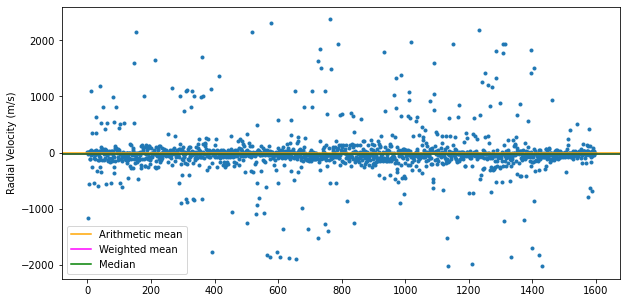

mean = -16610.38210 m/s ; standard deviation / √N = 9.90644 m/s
weighted mean = -16627.25884 m/s ; weighted standard deviation / √N = 0.17105 m/s
median = -16627.03626 m/s


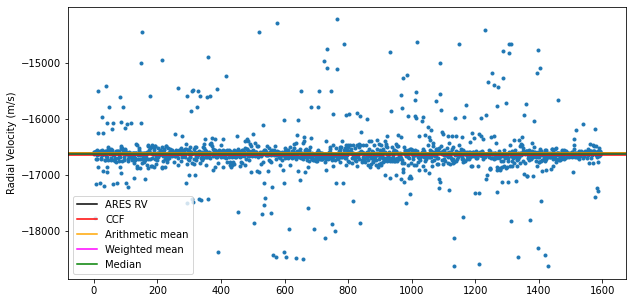

In [12]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
corr_median = np.median(corrRV)

N_dim_595[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

Removing outliers (2):

mean = -32.64742 m/s ; standard deviation / √N = 4.36253 m/s
weighted mean = -32.37357 m/s ; weighted standard deviation / √N = 0.17779 m/s
median = -27.79260 m/s


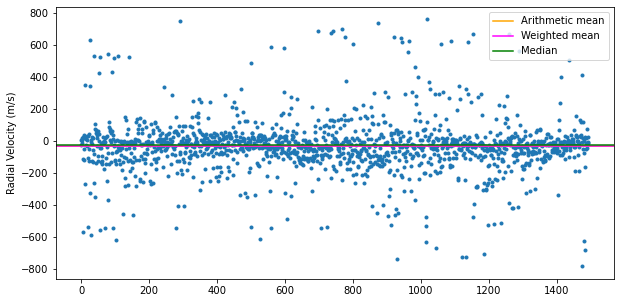

mean = -16632.64742 m/s ; standard deviation / √N = 4.36253 m/s
weighted mean = -16632.37357 m/s ; weighted standard deviation / √N = 0.17779 m/s
median = -16627.79260 m/s


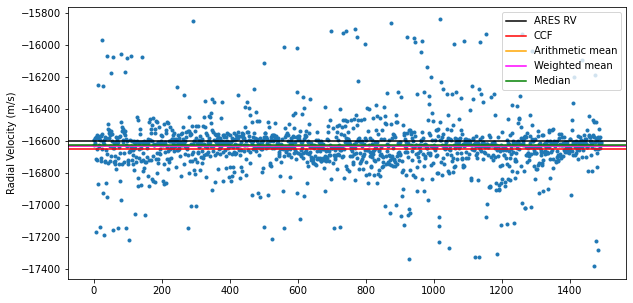

In [13]:
corr2RV = np.zeros(0)
corr2_uncert = np.zeros(0)

for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
    if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
        corr2RV = np.append(corr2RV,rv)
        corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)

corr2_wmean = corr2_mean
corr2_wstd = 0
f0 = 2e-3
sigma = (corr2RV - corr2_wmean) / corr2_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
    corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
    sigma = (corr2RV - corr2_wmean) / corr2_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
corr2_median = np.median(corr2RV)

N_595 = len(corr2RV)
mean_595 = corr2_mean
std_595 = corr2_std
wmean_595 = corr2_wmean
wstd_595 = corr2_wstd
median_595 = corr2_median

N_dim_595[2] = len(corr2RV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median))

plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

Matrix[1,0] = corr2_mean + ARES_RV
Matrix[1,1] = corr2_std / np.sqrt(len(corr2RV))
Matrix[1,2] = corr2_wmean + ARES_RV
Matrix[1,3] = corr2_wstd / np.sqrt(len(corr2RV))
Matrix[1,4] = corr2_median + ARES_RV

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## 1030

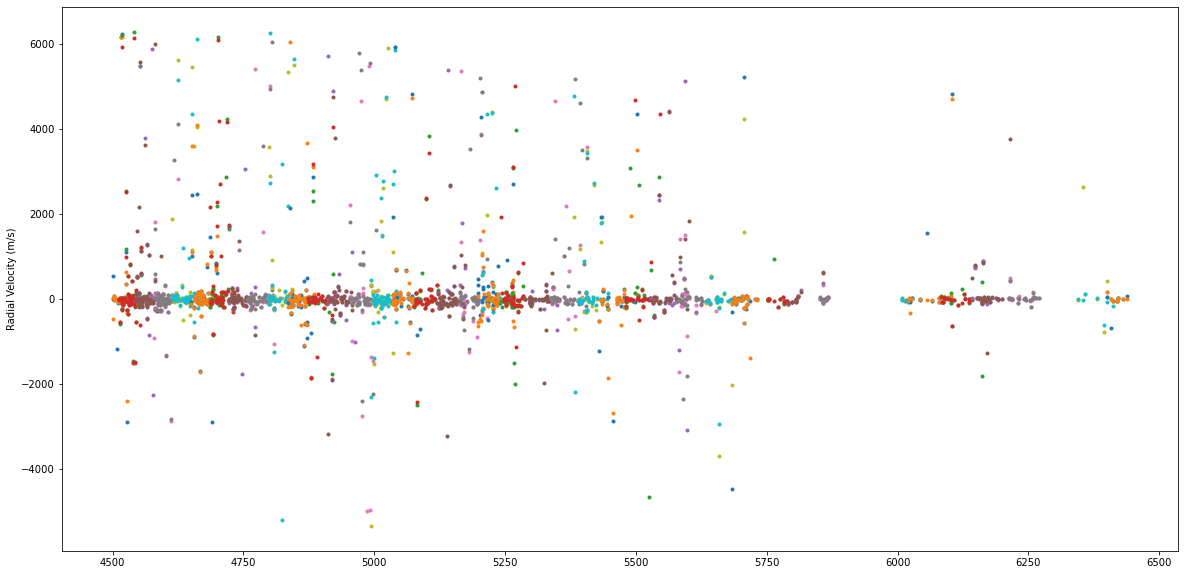

In [14]:
plt.rcParams['figure.figsize'] = (20, 10)

lines = loadtxt('data_1030/lines_1030.txt' , float) # loads the file with the line data
ori_lambda = lines[2:] # array with the reference values of the wavelength

numbers = np.arange(51,119) # array with the numbers used to access the files
n2 = np.arange(121,131)
numbers = np.append(numbers,n2)
n3 = np.arange(133,137)
numbers = np.append(numbers,n3)

N = len(numbers) 

data = np.zeros([N,71]) # empty matrix to store the fitted values of the wavelenghts
# the previous matrix has 27 columns because it is the maximum value of wavelenghts found
RV_matrix = np.zeros([N,71]) # empty matrix to store the RV values for each wavelenght
RV = np.zeros(0) # empty array to store the RV values
uncert_matrix = np.zeros([N,71])
uncert = np.zeros(0)
wave = np.zeros(0)

for i,n in enumerate(numbers):
    
    info=loadtxt('data_1030/{}.ares'.format(n),float) # loads the file with the data
    
    if np.ndim(info)!=1:
        fit=info[:,8]
        ref=info[:,0]
        err=info[:,9]
        M=len(fit)
        
    else:
        fit=info[8]
        ref=info[0]
        err=[9]
        M=1
        
    data[i,:M]=fit #stores the data for each document in the data matrix
    wave = np.append(wave,data[i,:M])
    
    # this lines identify the lines that should be used from the original line data
    distances = np.abs(ori_lambda[:, np.newaxis] - ref)
    closest_indices = np.argmin(distances, axis=0)
    ref= ori_lambda[closest_indices]
    
    RV_matrix[i,:M] = (fit - ref) / ref * cnt.c # calculates the values of RV and stores them in the RV_matrix
    RV=np.append(RV,RV_matrix[i,:M]) # stores the values in the RV array
    uncert_matrix[i,:M] = err / ref *cnt.c
    uncert = np.append(uncert,uncert_matrix[i,:M])
    
    plt.plot(ref,RV_matrix[i,:M],'.') # plots the graphic
    
N_dim_1030 = np.zeros(3,dtype=int) # array to store the number of lines in the beguining and after removing outliers
N_dim_1030[0] = len(RV)

uncert_1030 = uncert
wave_1030 = wave
    
plt.ylabel('Radial Velocity (m/s)')
plt.show()

mean = 167.20694 m/s ; standard deviation / √N = 20.73988 m/s
weighted mean = -16.54692 m/s ; weighted standard deviation / √N = 0.08289 m/s
median = -15.53912 m/s


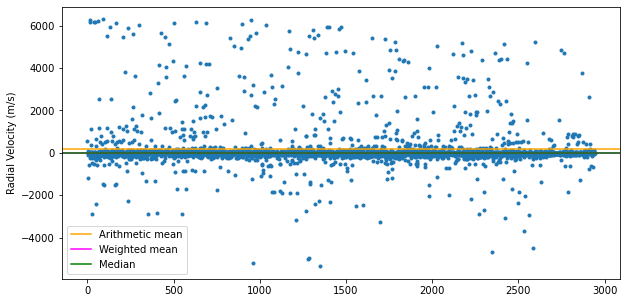

mean = -16432.79306 m/s ; standard deviation / √N = 20.73988 m/s
weighted mean = -16616.54692 m/s ; weighted standard deviation / √N = 0.08289 m/s
median = -16615.53912 m/s


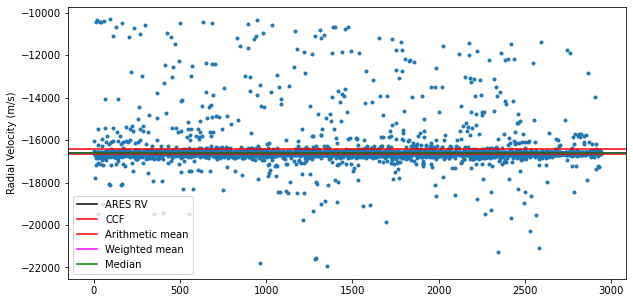

In [15]:
plt.rcParams['figure.figsize'] = (10, 5)

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV - wmean) / uncert_1030
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    wmean = (RV * pi * uncert_1030 ** (-2)).sum() / (pi * uncert_1030 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_1030 ** (-2)).sum())
    sigma = (RV - wmean) / uncert_1030
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
median = np.median(RV) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

ARES_RV = -16600

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='red')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

Removing outliers:

mean = 8.19370 m/s ; standard deviation / √N = 7.39964 m/s
weighted mean = -21.03866 m/s ; weighted standard deviation / √N = 0.08543 m/s
median = -19.21062 m/s


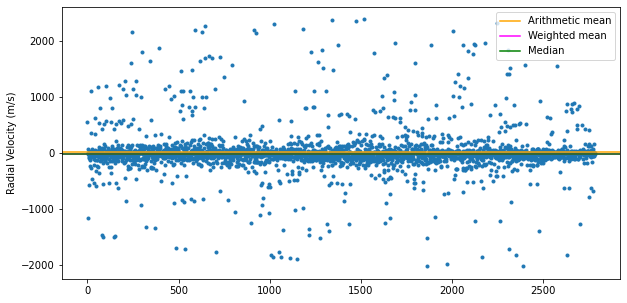

mean = -16591.80630 m/s ; standard deviation / √N = 7.39964 m/s
weighted mean = -16621.03866 m/s ; weighted standard deviation / √N = 0.08543 m/s
median = -16619.21062 m/s


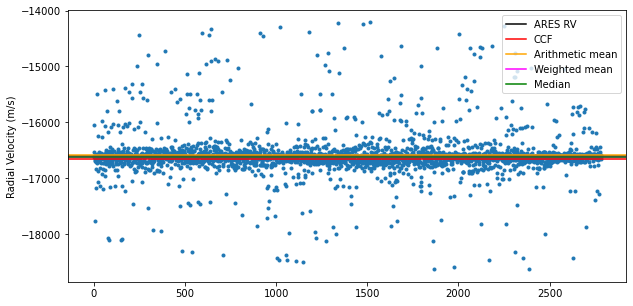

In [16]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
corr_median = np.median(corrRV)

N_dim_1030[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

Removing outliers (2):

mean = -20.10414 m/s ; standard deviation / √N = 3.28587 m/s
weighted mean = -23.49284 m/s ; weighted standard deviation / √N = 0.08833 m/s
median = -21.17509 m/s


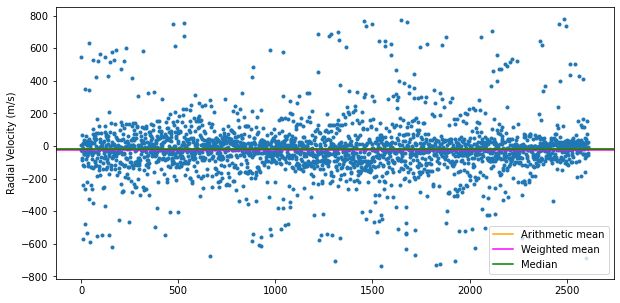

mean = -16620.10414 m/s ; standard deviation / √N = 3.28587 m/s
weighted mean = -16623.49284 m/s ; weighted standard deviation / √N = 0.08833 m/s
median = -16621.17509 m/s


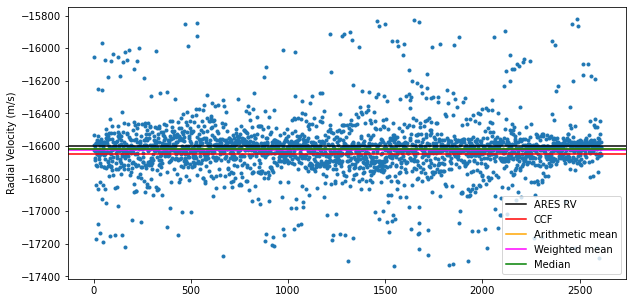

In [17]:
corr2RV = np.zeros(0)
corr2_uncert = np.zeros(0)

for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
    if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
        corr2RV = np.append(corr2RV,rv)
        corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)

corr2_wmean = corr2_mean
corr2_wstd = 0
f0 = 2e-3
sigma = (corr2RV - corr2_wmean) / corr2_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
    corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
    sigma = (corr2RV - corr2_wmean) / corr2_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
corr2_median = np.median(corr2RV)

N_dim_1030[2] = len(corr2RV)

N_1030 = len(corr2RV)
mean_1030 = corr2_mean
std_1030 = corr2_std
wmean_1030 = corr2_wmean
wstd_1030 = corr2_wstd
median_1030 = corr2_median

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median))

plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

Matrix[2,0] = corr2_mean + ARES_RV
Matrix[2,1] = corr2_std / np.sqrt(len(corr2RV))
Matrix[2,2] = corr2_wmean + ARES_RV
Matrix[2,3] = corr2_wstd / np.sqrt(len(corr2RV))
Matrix[2,4] = corr2_median + ARES_RV

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## 3741

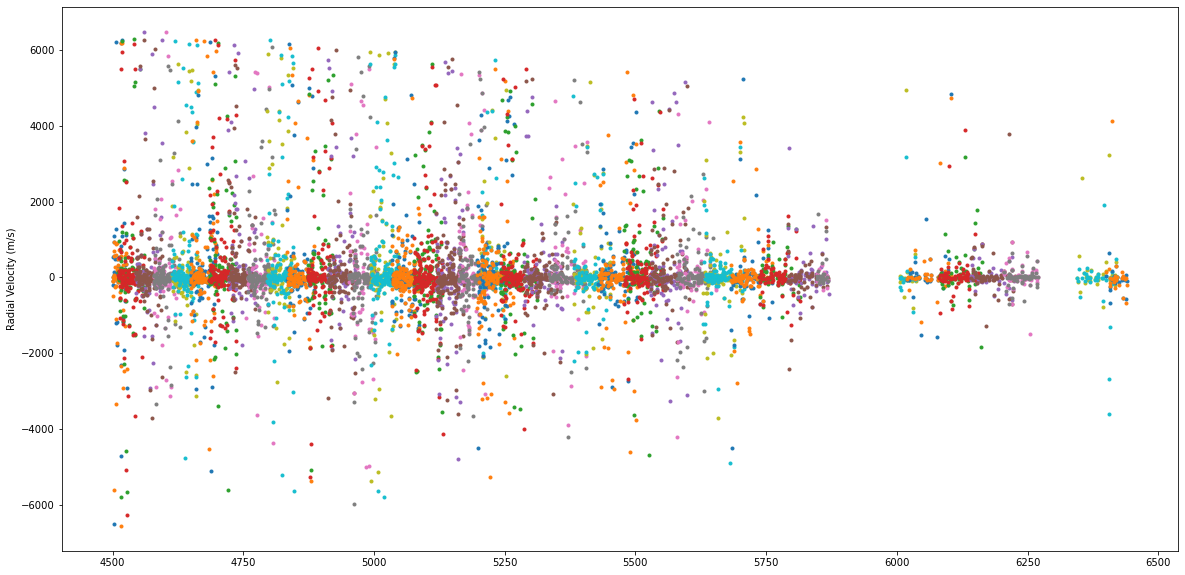

In [18]:
plt.rcParams['figure.figsize'] = (20, 10)

lines = loadtxt('data_3741/lines_3741.txt' , float) # loads the file with the line data
ori_lambda = lines[2:] # array with the reference values of the wavelength

numbers = np.arange(51,119) # array with the numbers used to access the files
n2 = np.arange(121,131)
numbers = np.append(numbers,n2)
n3 = np.arange(133,137)
numbers = np.append(numbers,n3)

N = len(numbers) 

data = np.zeros([N,171]) # empty matrix to store the fitted values of the wavelenghts
# the previous matrix has 27 columns because it is the maximum value of wavelenghts found
RV_matrix = np.zeros([N,171]) # empty matrix to store the RV values for each wavelenght
RV = np.zeros(0) # empty array to store the RV values
uncert_matrix = np.zeros([N,171])
uncert = np.zeros(0)
wave = np.zeros(0)

for i,n in enumerate(numbers):
    
    info=loadtxt('data_3741/{}.ares'.format(n),float) # loads the file with the data
    
    if np.ndim(info)!=1:
        fit=info[:,8]
        ref=info[:,0]
        err=info[:,9]
        M=len(fit)
        
    else:
        fit=info[8]
        ref=info[0]
        err=[9]
        M=1
        
    data[i,:M]=fit #stores the data for each document in the data matrix 
    wave = np.append(wave,data[i,:M])
    
    # this lines identify the lines that should be used from the original line data
    distances = np.abs(ori_lambda[:, np.newaxis] - ref)
    closest_indices = np.argmin(distances, axis=0)
    ref= ori_lambda[closest_indices]
    
    RV_matrix[i,:M] = (fit - ref) / ref * cnt.c # calculates the values of RV and stores them in the RV_matrix
    RV=np.append(RV,RV_matrix[i,:M]) # stores the values in the RV array
    uncert_matrix[i,:M] = err / ref *cnt.c
    uncert = np.append(uncert,uncert_matrix[i,:M])
    
    plt.plot(ref,RV_matrix[i,:M],'.') # plots the graphic
    
N_dim_3741 = np.zeros(3,dtype=int) # array to store the number of lines in the beguining and after removing outliers
N_dim_3741[0] = len(RV)

uncert_3741 = uncert
wave_3741 = wave
    
plt.ylabel('Radial Velocity (m/s)')
plt.show()

mean = 154.36446 m/s ; standard deviation / √N = 12.25639 m/s
weighted mean = 129.67431 m/s ; weighted standard deviation / √N = 0.01759 m/s
median = -3.51643 m/s


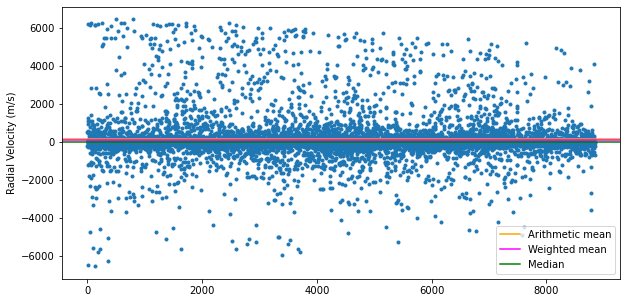

mean = -16445.63554 m/s ; standard deviation / √N = 12.25639 m/s
weighted mean = -16470.32569 m/s ; weighted standard deviation / √N = 0.01759 m/s
median = -16603.51643 m/s


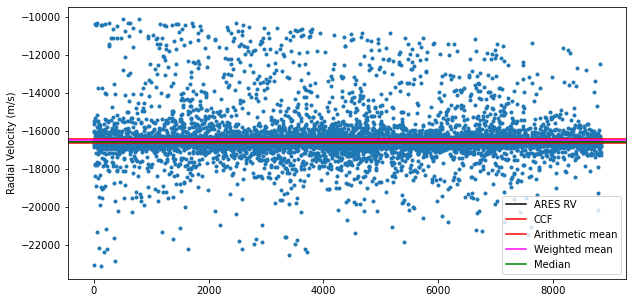

In [19]:
plt.rcParams['figure.figsize'] = (10, 5)

std = np.std(RV) # standard deviation of the values of the RVs
mean = np.mean(RV) # mean of the values of the RVs

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV - wmean) / uncert_3741
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    wmean = (RV * pi * uncert_3741 ** (-2)).sum() / (pi * uncert_3741 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_3741 ** (-2)).sum())
    sigma = (RV - wmean) / uncert_3741
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
median = np.median(RV) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

ARES_RV = -16600

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='red')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

Removing outliers:

mean = 20.44821 m/s ; standard deviation / √N = 5.76876 m/s
weighted mean = -9.40672 m/s ; weighted standard deviation / √N = 0.01456 m/s
median = -8.50611 m/s


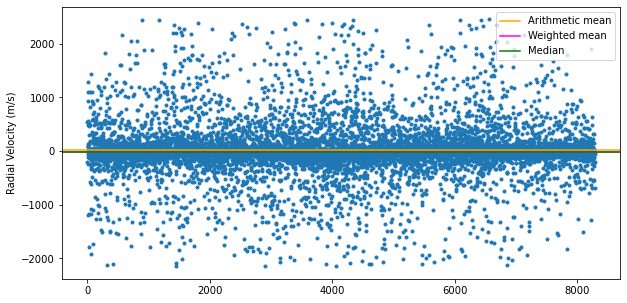

mean = -16579.55179 m/s ; standard deviation / √N = 5.76876 m/s
weighted mean = -16609.40672 m/s ; weighted standard deviation / √N = 0.01456 m/s
median = -16608.50611 m/s


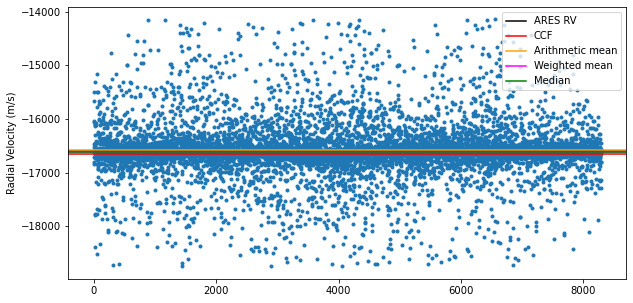

In [20]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
corr_median = np.median(corrRV)

N_dim_3741[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

Removing outliers (2):

mean = 8.01256 m/s ; standard deviation / √N = 3.51720 m/s
weighted mean = -18.23115 m/s ; weighted standard deviation / √N = 0.01995 m/s
median = -9.08253 m/s


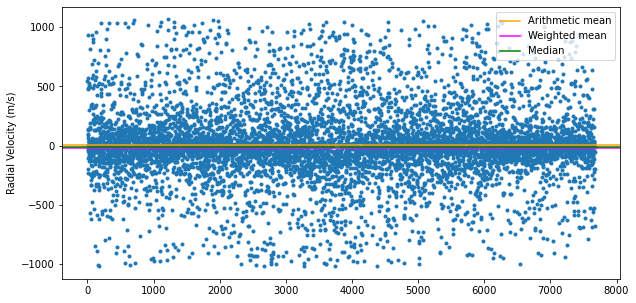

mean = -16591.98744 m/s ; standard deviation / √N = 3.51720 m/s
weighted mean = -16618.23115 m/s ; weighted standard deviation / √N = 0.01995 m/s
median = -16609.08253 m/s


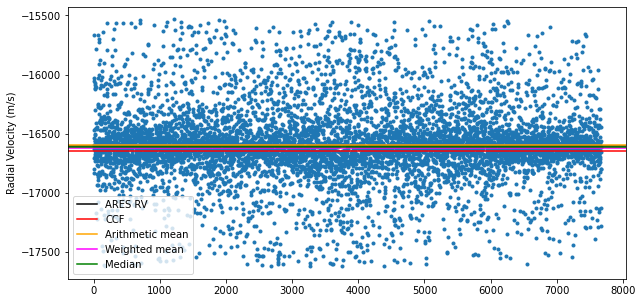

In [21]:
corr2RV = np.zeros(0)
corr2_uncert = np.zeros(0)

for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
    if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
        corr2RV = np.append(corr2RV,rv)
        corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)

corr2_wmean = corr2_mean
corr2_wstd = 0
f0 = 2e-3
sigma = (corr2RV - corr2_wmean) / corr2_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)

for i in range(2):
    corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
    corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
    sigma = (corr2RV - corr2_wmean) / corr2_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) - f0)
    
corr2_median = np.median(corr2RV)

N_3741 = len(corr2RV)
mean_3741 = corr2_mean
std_3741 = corr2_std
wmean_3741 = corr2_wmean
wstd_3741 = corr2_wstd
median_3741 = corr2_median

N_dim_3741[2] = len(corr2RV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median))

plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median, label= 'Median', color ='green')
plt.legend()
plt.show()

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

Matrix[3,0] = corr2_mean + ARES_RV
Matrix[3,1] = corr2_std / np.sqrt(len(corr2RV))
Matrix[3,2] = corr2_wmean + ARES_RV
Matrix[3,3] = corr2_wstd / np.sqrt(len(corr2RV))
Matrix[3,4] = corr2_median + ARES_RV

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Mean RV for a diferent number of initial wavelegnhts

Now that we have the mean RV values for each number of initial wavelenghts (229,595,1030,3741) we can make a graphic comparing this values. We used the last values calculated (in Removing outliers (2)).

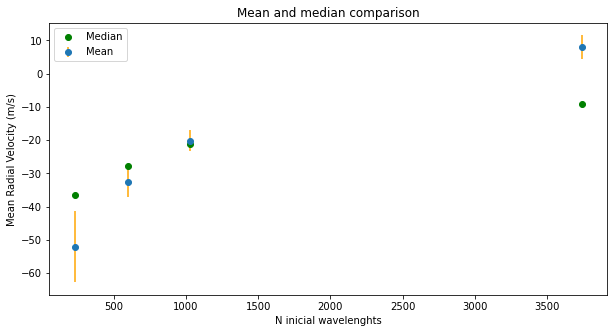

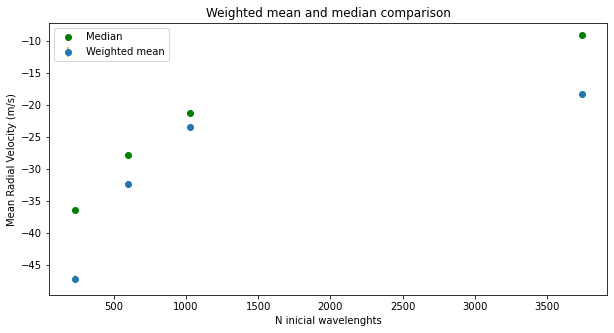

In [22]:
Means = np.array([mean_229,mean_595,mean_1030,mean_3741])
Std = np.array([std_229,std_595,std_1030,std_3741])
Wmeans = np.array([wmean_229,wmean_595,wmean_1030,wmean_3741])
Wstd = np.array([wstd_229,wstd_595,wstd_1030,wstd_3741])
Medians = np.array([median_229,median_595,median_1030,median_3741])

Std_root = np.array([std_229 / np.sqrt(N_229),std_595 / np.sqrt(N_595),std_1030 / np.sqrt(N_1030),std_3741 / np.sqrt(N_3741)])
Wstd_root = np.array([wstd_229 / np.sqrt(N_229),wstd_595 / np.sqrt(N_595),wstd_1030 / np.sqrt(N_1030),wstd_3741 / np.sqrt(N_3741)])

N_wave = np.array([229,595,1030,3741])

#plt.errorbar(N_wave,Means,yerr=Std,ecolor='blue',fmt='o',label='Mean')
plt.errorbar(N_wave,Means,yerr=Std_root,ecolor='orange',fmt='o',label='Mean')
plt.plot(N_wave,Medians,'o',label='Median',color='green')
plt.legend()
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
plt.title('Mean and median comparison')
plt.show()

#plt.errorbar(N_wave,Wmeans,yerr=Wstd,ecolor='blue',fmt='o',label='Weighted mean')
plt.errorbar(N_wave,Wmeans,yerr=Wstd_root,ecolor='orange',fmt='o',label='Weighted mean')
plt.plot(N_wave,Medians,'o',label='Median',color='green')
plt.legend()
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
plt.title('Weighted mean and median comparison')
plt.show()

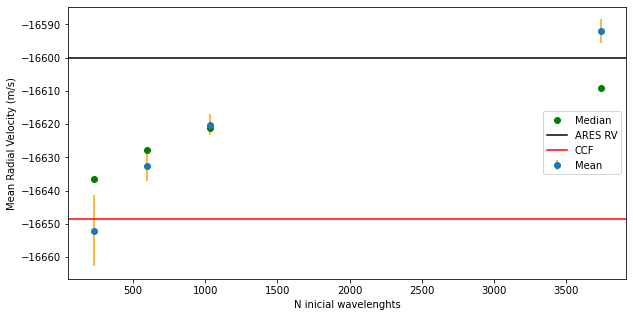

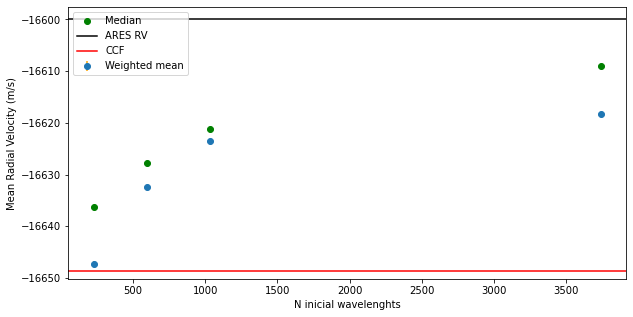

In [23]:
#plt.errorbar(N_wave,Means+ARES_RV,yerr=Std,ecolor='blue',fmt='o',label='Mean')
plt.errorbar(N_wave,Means+ARES_RV,yerr=Std_root,ecolor='orange',fmt='o',label='Mean')
plt.plot(N_wave,Medians+ARES_RV,'o',label='Median',color='green')
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
plt.axhline(-16600,label='ARES RV',color='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.legend()
plt.show()

#plt.errorbar(N_wave,Wmeans+ARES_RV,yerr=Wstd,ecolor='blue',fmt='o',label='Weighted mean')
plt.errorbar(N_wave,Wmeans+ARES_RV,yerr=Wstd_root,ecolor='orange',fmt='o',label='Weighted mean')
plt.plot(N_wave,Medians+ARES_RV,'o',label='Median',color='green')
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
plt.axhline(-16600,label='ARES RV',color='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.legend()
plt.show()

## Percentage of wavelenght decrease

To understand how much the number of wavelenghts/radial velocities decreases with each outliers removal, the following graphic was made.

   N ref lines  N fitted lines  1st removal      1st %  2nd removal      2nd %
0          229             685          626  91.386861          580  84.671533
1          595            1703         1597  93.775690         1493  87.668820
2         1030            2943         2783  94.563371         2612  88.752973
3         3741            8845         8292  93.747880         7671  86.726964


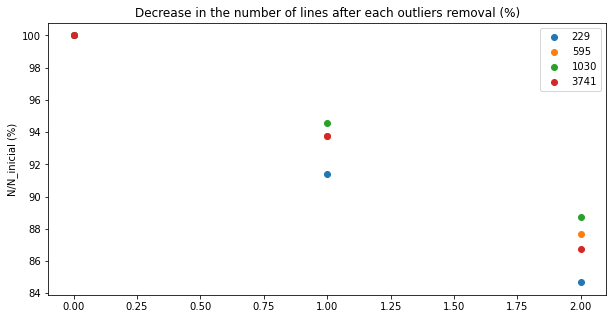

In [24]:
import pandas as pd

data = {
    'N ref lines':[229,595,1030,3741],
    'N fitted lines':[N_dim_229[0],N_dim_595[0],N_dim_1030[0],N_dim_3741[0]],
    '1st removal':[N_dim_229[1],N_dim_595[1],N_dim_1030[1],N_dim_3741[1]],
    '1st %':[N_dim_229[1]/N_dim_229[0]*100,N_dim_595[1]/N_dim_595[0]*100,N_dim_1030[1]/N_dim_1030[0]*100,N_dim_3741[1]/N_dim_3741[0]*100],
    '2nd removal':[N_dim_229[2],N_dim_595[2],N_dim_1030[2],N_dim_3741[2]],
    '2nd %':[N_dim_229[2]/N_dim_229[0]*100,N_dim_595[2]/N_dim_595[0]*100,N_dim_1030[2]/N_dim_1030[0]*100,N_dim_3741[2]/N_dim_3741[0]*100]
}

# Create a DataFrame (table) from the data
df = pd.DataFrame(data)

# Display the table
print(df)

N_dim_229_per = np.array([1,N_dim_229[1] / N_dim_229[0],N_dim_229[2] / N_dim_229[0]])*100
N_dim_595_per = np.array([1,N_dim_595[1] / N_dim_595[0],N_dim_595[2] / N_dim_595[0]])*100
N_dim_1030_per = np.array([1,N_dim_1030[1] / N_dim_1030[0],N_dim_1030[2] / N_dim_1030[0]])*100
N_dim_3741_per = np.array([1,N_dim_3741[1] / N_dim_3741[0],N_dim_3741[2] / N_dim_3741[0]])*100


plt.plot(N_dim_229_per,'o',label='229')
plt.plot(N_dim_595_per,'o',label='595')
plt.plot(N_dim_1030_per,'o',label='1030')
plt.plot(N_dim_3741_per,'o',label='3741')
plt.legend()
plt.title('Decrease in the number of lines after each outliers removal (%)')
plt.ylabel('N/N_inicial (%)')
plt.show()

## Histograms of the error

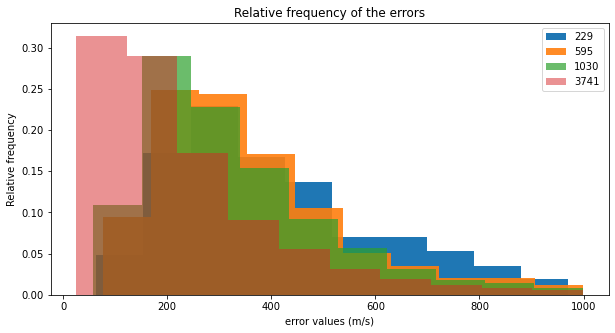

In [25]:
new_uncert_229 = [x for x in uncert_229 if x < 1e3]
plt.hist(new_uncert_229,weights=np.zeros_like(new_uncert_229) + 1. / len(new_uncert_229),label='229',alpha=1)

new_uncert_595 = [x for x in uncert_595 if x < 1e3]
plt.hist(new_uncert_595,weights=np.zeros_like(new_uncert_595) + 1. / len(new_uncert_595),label='595',alpha=0.9)

new_uncert_1030 = [x for x in uncert_1030 if x < 1e3]
plt.hist(new_uncert_1030,weights=np.zeros_like(new_uncert_1030) + 1. / len(new_uncert_1030),label='1030',alpha=0.7)

new_uncert_3741 = [x for x in uncert_3741 if x < 1e3]
plt.hist(new_uncert_3741,weights=np.zeros_like(new_uncert_3741) + 1. / len(new_uncert_3741),label='3741',alpha=0.5)

plt.title('Relative frequency of the errors')
plt.xlabel('error values (m/s)')
plt.ylabel('Relative frequency')
plt.legend()
plt.show()

## Uncertainty as a function of wavelenght

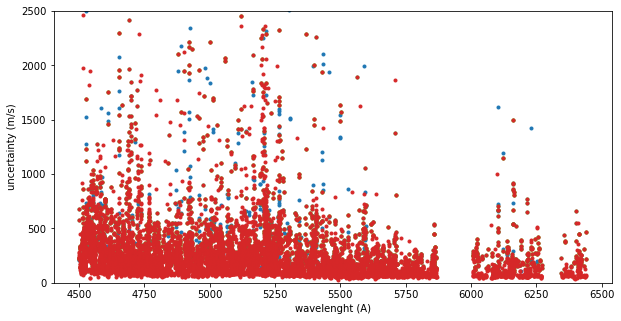

In [26]:
plt.plot(wave_229,uncert_229,'.')
plt.plot(wave_595,uncert_595,'.')
plt.plot(wave_1030,uncert_1030,'.')
plt.plot(wave_3741,uncert_3741,'.')
plt.ylim(0,2500)
plt.xlabel('wavelenght (A)')
plt.ylabel('uncertainty (m/s)')
plt.show()

In [27]:
np.savetxt('values_1.txt',Matrix)